# Project: Investigate a Dataset - [FBI Gun Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
    The data I've chosen comes from the FBI's National Instant Criminal Background Check         System (NICS). NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms or explosives. Cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase before they ring up the sale. In this way, people with a criminal background are less likely to purchase a gun.
* **The** [**NICS data**](https://docs.google.com/viewer?url=https%3A%2F%2Fd17h27t6h515a5.cloudfront.net%2Ftopher%2F2017%2FNovember%2F5a0a4db8_gun-data%2Fgun-data.xlsx) has the following features with a description to each feature:
    * Type of **firearm**:
    
        1. *Handgun* : Any firearm which has a short stock and is designed to be held and fired by the use of a single hand.
        2. *Long Gun* : A weapon designed or redesigned, made or remade, and intended to be fired from the shoulder.
        3. *Other* : Refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns).
        
        
    * The **transaction** types:
    
        1. *Pre-Pawn* : Background checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.
        2. *Redemption* : background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.
        3. *Returned/Disposition* : background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited.
        4. *Rentals* : background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.
        5. *Private Sale* : background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.
        6. *Return to Seller-Private Sale* : background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.
        
        
    * **Multiple** : denotes a background check where more than one type of firearm is associated to a single background check.
    
    
    * **Admin** : denotes the administrative checks that are for other authorized uses of the NICS.
    
    
* **The US census data** : *The features that will help me answering the analysis questions are*:
    1. Fact.
    2. All the states.
* The helpful records are:
    1. **ID** = 0, **'Fact'** = "Population estimates, July 1, 2016, (V2016)"
    2. **ID** = 1, **'Fact'** = "Population estimates base, April 1, 2010, (V2016)" 





#### **Analytics Questions**
   * Q1 : What are Criminal Background Checks rate in each state?
   * Q2 : What is the trend of Criminal Background Checks for each type of firearms (Handgun, Long Gun, Other) in each state.


In [1]:

import pandas as pd
import numpy as np


<a id='wrangling'></a>
## Data Wrangling


#### The first dataset.

In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df = pd.read_csv('US_Census_Data.csv')
df

Fact  \
0        Population estimates, July 1, 2016,  (V2016)   
1   Population estimates base, April 1, 2010,  (V2...   
2   Population, percent change - April 1, 2010 (es...   
3                   Population, Census, April 1, 2010   
4   Persons under 5 years, percent, July 1, 2016, ...   
..                                                ...   
80                                                 FN   
81                                                NaN   
82                                                  S   
83                                                  X   
84                                                  Z   

                                            Fact Note    Alabama   Alaska  \
0                                                 NaN  4,863,300  741,894   
1                                                 NaN  4,780,131  710,249   
2                                                 NaN      1.70%    4.50%   
3                                                 NaN  4,779,736  710,231   
4                                                 NaN      6.00%    7.30%   
..                                                ...        ...      ...   
80             Footnote on this item in place of data        NaN      NaN   
81                                      Not available        NaN      NaN   
82    Suppressed; does not meet publication standards        NaN      NaN   
83                                     Not applicable        NaN      NaN   
84  Value greater than zero but less than half uni...        NaN      NaN   

      Arizona   Arkansas  California   Colorado Connecticut Delaware  ...  \
0   6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065  ...   
1   6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936  ...   
2       8.40%      2.50%       5.40%     10.20%       0.10%    6.00%  ...   
3   6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934  ...   
4       6.30%      6.40%       6.30%      6.10%       5.20%    5.80%  ...   
..        ...        ...         ...        ...         ...      ...  ...   
80        NaN        NaN         NaN        NaN         NaN      NaN  ...   
81        NaN        NaN         NaN        NaN         NaN      NaN  ...   
82        NaN        NaN         NaN        NaN         NaN      NaN  ...   
83        NaN        NaN         NaN        NaN         NaN      NaN  ...   
84        NaN        NaN         NaN        NaN         NaN      NaN  ...   

   South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0        865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1        814195   6346298  25,146,100  2,763,888  625,741  8,001,041   
2         0.063     0.048      10.80%     10.40%   -0.20%      5.10%   
3        814180   6346105  25,145,561  2,763,885  625,741  8,001,024   
4         0.071     0.061       7.20%      8.30%    4.90%      6.10%   
..          ...       ...         ...        ...      ...        ...   
80          NaN       NaN         NaN        NaN      NaN        NaN   
81          NaN       NaN         NaN        NaN      NaN        NaN   
82          NaN       NaN         NaN        NaN      NaN        NaN   
83          NaN       NaN         NaN        NaN      NaN        NaN   
84          NaN       NaN         NaN        NaN      NaN        NaN   

   Washington West Virginia  Wisconsin  Wyoming  
0   7,288,000     1,831,102  5,778,708  585,501  
1   6,724,545     1,853,011  5,687,289  563,767  
2       8.40%        -1.20%      1.60%    3.90%  
3   6,724,540     1,852,994  5,686,986  563,626  
4       6.20%         5.50%      5.80%    6.50%  
..        ...           ...        ...      ...  
80        NaN           NaN        NaN      NaN  
81        NaN           NaN        NaN      NaN  
82        NaN           NaN        NaN      NaN  
83        NaN           NaN        NaN      NaN  
84        NaN           NaN        NaN      NaN  

[85 rows x 52 columns]

#### The second dataset.

In [3]:
df_gun = pd.read_csv('gun_data.csv')
df_gun

month          state   permit  permit_recheck  handgun  long_gun  \
0      2017-09        Alabama  16717.0             0.0   5734.0    6320.0   
1      2017-09         Alaska    209.0             2.0   2320.0    2930.0   
2      2017-09        Arizona   5069.0           382.0  11063.0    7946.0   
3      2017-09       Arkansas   2935.0           632.0   4347.0    6063.0   
4      2017-09     California  57839.0             0.0  37165.0   24581.0   
...        ...            ...      ...             ...      ...       ...   
12480  1998-11       Virginia      0.0             NaN     14.0       2.0   
12481  1998-11     Washington      1.0             NaN     65.0     286.0   
12482  1998-11  West Virginia      3.0             NaN    149.0     251.0   
12483  1998-11      Wisconsin      0.0             NaN     25.0     214.0   
12484  1998-11        Wyoming      8.0             NaN     45.0      49.0   

        other  multiple  admin  prepawn_handgun  ...  returned_other  \
0       221.0       317    0.0             15.0  ...             0.0   
1       219.0       160    0.0              5.0  ...             0.0   
2       920.0       631    0.0             13.0  ...             0.0   
3       165.0       366   51.0             12.0  ...             0.0   
4      2984.0         0    0.0              0.0  ...             0.0   
...       ...       ...    ...              ...  ...             ...   
12480     NaN         8    0.0              NaN  ...             NaN   
12481     NaN         8    1.0              NaN  ...             NaN   
12482     NaN         5    0.0              NaN  ...             NaN   
12483     NaN         2    0.0              NaN  ...             NaN   
12484     NaN         5    0.0              NaN  ...             NaN   

       rentals_handgun  rentals_long_gun  private_sale_handgun  \
0                  0.0               0.0                   9.0   
1                  0.0               0.0                  17.0   
2                  0.0               0.0                  38.0   
3                  0.0               0.0                  13.0   
4                  0.0               0.0                   0.0   
...                ...               ...                   ...   
12480              NaN               NaN                   NaN   
12481              NaN               NaN                   NaN   
12482              NaN               NaN                   NaN   
12483              NaN               NaN                   NaN   
12484              NaN               NaN                   NaN   

       private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
0                       16.0                 3.0                       0.0   
1                       24.0                 1.0                       0.0   
2                       12.0                 2.0                       0.0   
3                       23.0                 0.0                       0.0   
4                        0.0                 0.0                       0.0   
...                      ...                 ...                       ...   
12480                    NaN                 NaN                       NaN   
12481                    NaN                 NaN                       NaN   
12482                    NaN                 NaN                       NaN   
12483                    NaN                 NaN                       NaN   
12484                    NaN                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
0                            0.0                     3.0   32019  
1                            0.0                     0.0    6303  
2                            0.0                     0.0   28394  
3                            2.0                     1.0   17747  
4                            0.0                     0.0  123506  
...                          ...                     ...     ...  
12480               

In [4]:
#Display some records from the beginning and the end of both datasets.

In [5]:
#for the first dataset
df.head()

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4,780,131   
2  Population, percent change - April 1, 2010 (es...       NaN      1.70%   
3                  Population, Census, April 1, 2010       NaN  4,779,736   
4  Persons under 5 years, percent, July 1, 2016, ...       NaN      6.00%   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2    4.50%      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3  710,231  6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4    7.30%      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   

   ... South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0  ...       865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1  ...       814195   6346298  25,146,100  2,763,888  625,741  8,001,041   
2  ...        0.063     0.048      10.80%     10.40%   -0.20%      5.10%   
3  ...       814180   6346105  25,145,561  2,763,885  625,741  8,001,024   
4  ...        0.071     0.061       7.20%      8.30%    4.90%      6.10%   

  Washington West Virginia  Wisconsin  Wyoming  
0  7,288,000     1,831,102  5,778,708  585,501  
1  6,724,545     1,853,011  5,687,289  563,767  
2      8.40%        -1.20%      1.60%    3.90%  
3  6,724,540     1,852,994  5,686,986  563,626  
4      6.20%         5.50%      5.80%    6.50%  

[5 rows x 52 columns]

In [6]:
df.tail()

Fact                                          Fact Note Alabama Alaska  \
80   FN             Footnote on this item in place of data     NaN    NaN   
81  NaN                                      Not available     NaN    NaN   
82    S    Suppressed; does not meet publication standards     NaN    NaN   
83    X                                     Not applicable     NaN    NaN   
84    Z  Value greater than zero but less than half uni...     NaN    NaN   

   Arizona Arkansas California Colorado Connecticut Delaware  ...  \
80     NaN      NaN        NaN      NaN         NaN      NaN  ...   
81     NaN      NaN        NaN      NaN         NaN      NaN  ...   
82     NaN      NaN        NaN      NaN         NaN      NaN  ...   
83     NaN      NaN        NaN      NaN         NaN      NaN  ...   
84     NaN      NaN        NaN      NaN         NaN      NaN  ...   

   South Dakota Tennessee Texas Utah Vermont Virginia Washington  \
80          NaN       NaN   NaN  NaN     NaN      NaN        NaN   
81          NaN       NaN   NaN  NaN     NaN      NaN        NaN   
82          NaN       NaN   NaN  NaN     NaN      NaN        NaN   
83          NaN       NaN   NaN  NaN     NaN      NaN        NaN   
84          NaN       NaN   NaN  NaN     NaN      NaN        NaN   

   West Virginia Wisconsin Wyoming  
80           NaN       NaN     NaN  
81           NaN       NaN     NaN  
82           NaN       NaN     NaN  
83           NaN       NaN     NaN  
84           NaN       NaN     NaN  

[5 rows x 52 columns]

In [7]:
#for the second dataset
df_gun.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [8]:
df_gun.tail()

month          state  permit  permit_recheck  handgun  long_gun  \
12480  1998-11       Virginia     0.0             NaN     14.0       2.0   
12481  1998-11     Washington     1.0             NaN     65.0     286.0   
12482  1998-11  West Virginia     3.0             NaN    149.0     251.0   
12483  1998-11      Wisconsin     0.0             NaN     25.0     214.0   
12484  1998-11        Wyoming     8.0             NaN     45.0      49.0   

       other  multiple  admin  prepawn_handgun  ...  returned_other  \
12480    NaN         8    0.0              NaN  ...             NaN   
12481    NaN         8    1.0              NaN  ...             NaN   
12482    NaN         5    0.0              NaN  ...             NaN   
12483    NaN         2    0.0              NaN  ...             NaN   
12484    NaN         5    0.0              NaN  ...             NaN   

       rentals_handgun  rentals_long_gun  private_sale_handgun  \
12480              NaN               NaN                   NaN   
12481              NaN               NaN                   NaN   
12482              NaN               NaN                   NaN   
12483              NaN               NaN                   NaN   
12484              NaN               NaN                   NaN   

       private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
12480                    NaN                 NaN                       NaN   
12481                    NaN                 NaN                       NaN   
12482                    NaN                 NaN                       NaN   
12483                    NaN                 NaN                       NaN   
12484                    NaN                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
12480                        NaN                     NaN      24  
12481                        NaN                     NaN     361  
12482                        NaN                     NaN     408  
12483                        NaN                     NaN     241  
12484                        NaN                     NaN     107  

[5 rows x 27 columns]

In [9]:
def printDS(df):
    print(f"The first dataset contains {df.shape[0]:,} records, and {df.shape[1]:,} features")

In [10]:
#Print the number of rows and columns in each dataset
printDS(df)

The first dataset contains 85 records, and 52 features


In [11]:
#For the second dataset
printDS(df_gun)

The first dataset contains 12,485 records, and 27 features


## Data Cleaning

### -Droppin unwanted records from the first dataset.
#### (US census data)

In [12]:
records = list(range(2,85))


In [13]:
#In the introduction i pointed that only want the first 3 records from the first dataset.
df.drop(records,axis=0, inplace=True)


In [14]:
#now, i would like to drop the column "Fact Note" since there are no values in it.
df.drop(['Fact Note'], axis=1, inplace=True)


In [15]:
#for good measure i want to rename the records of the feature "Fact"
df['Fact'] = df['Fact'].replace({"Population estimates, July 1, 2016, (V2016)": "Population Estimates (2016)"}, inplace=True)
#I just don't know what happened here :(, because after this line every value was NaN in 'Fact'
df['Fact'][0] = "Population Estimates(2016)"
df['Fact'][1] = "Population Estimates(2010)"


#### -Check for missing data and duplicates

In [16]:
#Are there any missing data in the first dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            2 non-null      object
 1   Alabama         2 non-null      object
 2   Alaska          2 non-null      object
 3   Arizona         2 non-null      object
 4   Arkansas        2 non-null      object
 5   California      2 non-null      object
 6   Colorado        2 non-null      object
 7   Connecticut     2 non-null      object
 8   Delaware        2 non-null      object
 9   Florida         2 non-null      object
 10  Georgia         2 non-null      object
 11  Hawaii          2 non-null      object
 12  Idaho           2 non-null      object
 13  Illinois        2 non-null      object
 14  Indiana         2 non-null      object
 15  Iowa            2 non-null      object
 16  Kansas          2 non-null      object
 17  Kentucky        2 non-null      object
 18  Louisiana     

In [17]:
#There are no missing data,now let's check the second dataset
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [18]:
#Now let's check for duplicates, for the first dataset
print(f"Duplicates sum in the first dataset : {df.duplicated().sum()}, and in the second dataset : {df_gun.duplicated().sum()}")

Duplicates sum in the first dataset : 0, and in the second dataset : 0


### -Dealing with null values.
    yes there are a lot of missing data which should be dealt with in the right way(drop    null values or fill them with the right value in each column). Let's start with the     df_gun dataset, now the null values should be replaced with the value 0 because there   are so many null values in some columns and removing them would create a massive issue, (states, months and other values would be lost), so to not mess up my communicating     results this is my logical approach.

In [19]:
#View missing values count for each feature in df_gun 
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [20]:
#there are a lot of missing data in some types of guns or checks so i will not risk dropping that many data
df_gun.fillna(0, inplace=True)
df_gun.isnull().any()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [21]:
#Let's check the first data.
df.isnull().sum()

Fact              0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0


In [22]:
#cool!, there are no missing data

#### -Dealing with columns' datatypes.

In [23]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12485 non-null  float64
 3   permit_recheck             12485 non-null  float64
 4   handgun                    12485 non-null  float64
 5   long_gun                   12485 non-null  float64
 6   other                      12485 non-null  float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12485 non-null  float64
 9   prepawn_handgun            12485 non-null  float64
 10  prepawn_long_gun           12485 non-null  float64
 11  prepawn_other              12485 non-null  float64
 12  redemption_handgun         12485 non-null  float64
 13  redemption_long_gun        12485 non-null  flo

In [24]:
df_gun.describe()

permit  permit_recheck        handgun       long_gun  \
count   12485.000000    12485.000000   12485.000000   12485.000000   
mean     6401.300441      102.727433    5931.364277    7798.960833   
std     23731.158830     2756.731662    8614.954626    9307.740581   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000     857.000000    2063.000000   
50%       511.000000        0.000000    3046.000000    5114.000000   
75%      4257.000000        0.000000    7277.000000   10374.000000   
max    522188.000000   116681.000000  107224.000000  108058.000000   

              other      multiple         admin  prepawn_handgun  \
count  12485.000000  12485.000000  12485.000000     12485.000000   
mean     158.798078    268.603364     58.789588         4.076652   
std      913.339655    783.185073    604.262697        10.174706   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.000000     15.000000      0.000000         0.000000   
50%        0.000000    125.000000      0.000000         0.000000   
75%       89.000000    301.000000      0.000000         3.000000   
max    77929.000000  38907.000000  28083.000000       164.000000   

       prepawn_long_gun  prepawn_other  ...  returned_other  rentals_handgun  \
count      12485.000000   12485.000000  ...    12485.000000     12485.000000   
mean           6.613696       0.067841  ...        0.149379         0.006087   
std           15.395329       0.681467  ...        1.710795         0.179790   
min            0.000000       0.000000  ...        0.000000         0.000000   
25%            0.000000       0.000000  ...        0.000000         0.000000   
50%            0.000000       0.000000  ...        0.000000         0.000000   
75%            6.000000       0.000000  ...        0.000000         0.000000   
max          269.000000      49.000000  ...       64.000000        12.000000   

       rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
count      12485.000000          12485.000000           12485.000000   
mean           0.005767              3.289868               2.555707   
std            0.173912             33.987054              25.908792   
min            0.000000              0.000000               0.000000   
25%            0.000000              0.000000               0.000000   
50%            0.000000              0.000000               0.000000   
75%            0.000000              0.000000               0.000000   
max           12.000000           1017.000000             777.000000   

       private_sale_other  return_to_seller_handgun  \
count        12485.000000              12485.000000   
mean             0.226912                  0.079696   
std              2.139596                  0.663611   
min              0.000000                  0.000000   
25%              0.000000                  0.000000   
50%              0.000000                  0.000000   
75%              0.000000                  0.000000   
max             71.000000                 28.000000   

       return_to_seller_long_gun  return_to_seller_other         totals  
count               12485.000000            12485.000000   12485.000000  
mean                    0.097317                0.019143   21595.725911  
std                     0.740136                0.186114   32591.418387  
min                     0.000000                0.000000       0.000000  
25%                     0.000000                0.000000    4638.000000  
50%                     0.000000                0.000000   12399.000000  
75%                     0.000000                0.000000   25453.000000  
max                    17.000000                4.000000  541978.000000  

[8 rows x 25 columns]

In [25]:
#The max values in these columns are low so their dtype could be int8
np.iinfo("int8")

iinfo(min=-128, max=127, dtype=int8)

In [26]:
#The values in these columns are all under 127.
columns = ['prepawn_handgun','prepawn_long_gun', 'prepawn_other', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other']

for col in columns:
    df_gun[col] = df_gun[col].astype("int16")
df_gun.info()
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12485 non-null  float64
 3   permit_recheck             12485 non-null  float64
 4   handgun                    12485 non-null  float64
 5   long_gun                   12485 non-null  float64
 6   other                      12485 non-null  float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12485 non-null  float64
 9   prepawn_handgun            12485 non-null  int16  
 10  prepawn_long_gun           12485 non-null  int16  
 11  prepawn_other              12485 non-null  int16  
 12  redemption_handgun         12485 non-null  float64
 13  redemption_long_gun        12485 non-null  flo

In [27]:
#The followin features wern't in the previous describe function
cols = ['redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun']

for col in cols:
    print(f"\n{col}\n", df_gun[col].describe())


redemption_handgun
 count    12485.000000
mean       344.577333
std        735.036825
min          0.000000
25%          0.000000
50%          2.000000
75%        421.000000
max      10046.000000
Name: redemption_handgun, dtype: float64

redemption_long_gun
 count    12485.000000
mean       506.156268
std        901.549269
min          0.000000
25%          0.000000
50%         83.000000
75%        670.000000
max       8831.000000
Name: redemption_long_gun, dtype: float64

redemption_other
 count    12485.000000
mean         0.743692
std          3.061003
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         79.000000
Name: redemption_other, dtype: float64

returned_handgun
 count    12485.000000
mean         5.218102
std         36.194758
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        603.000000
Name: returned_handgun, dtype: float64

returned_long_gun
 count    12485.000000
mean        

In [28]:
#Only 'redemption_other' could be int8
df_gun['redemption_other'] = df_gun['redemption_other'].astype("int16")
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12485 non-null  float64
 3   permit_recheck             12485 non-null  float64
 4   handgun                    12485 non-null  float64
 5   long_gun                   12485 non-null  float64
 6   other                      12485 non-null  float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12485 non-null  float64
 9   prepawn_handgun            12485 non-null  int16  
 10  prepawn_long_gun           12485 non-null  int16  
 11  prepawn_other              12485 non-null  int16  
 12  redemption_handgun         12485 non-null  float64
 13  redemption_long_gun        12485 non-null  flo

##### not only using max values made us decide we can check for unique values to decide the best dtype.

In [29]:
df_gun.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

In [30]:
df_gun['month'] = df_gun['month'].astype("category")
df_gun['state'] = df_gun['state'].astype("category")
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   month                      12485 non-null  category
 1   state                      12485 non-null  category
 2   permit                     12485 non-null  float64 
 3   permit_recheck             12485 non-null  float64 
 4   handgun                    12485 non-null  float64 
 5   long_gun                   12485 non-null  float64 
 6   other                      12485 non-null  float64 
 7   multiple                   12485 non-null  int64   
 8   admin                      12485 non-null  float64 
 9   prepawn_handgun            12485 non-null  int16   
 10  prepawn_long_gun           12485 non-null  int16   
 11  prepawn_other              12485 non-null  int16   
 12  redemption_handgun         12485 non-null  float64 
 13  redemption_long_gun        1248

In [31]:
df_gun.head(50)

month                 state    permit  permit_recheck  handgun  \
0   2017-09               Alabama   16717.0             0.0   5734.0   
1   2017-09                Alaska     209.0             2.0   2320.0   
2   2017-09               Arizona    5069.0           382.0  11063.0   
3   2017-09              Arkansas    2935.0           632.0   4347.0   
4   2017-09            California   57839.0             0.0  37165.0   
5   2017-09              Colorado    4356.0             0.0  15751.0   
6   2017-09           Connecticut    4343.0           673.0   4834.0   
7   2017-09              Delaware     275.0             0.0   1414.0   
8   2017-09  District of Columbia       1.0             0.0     56.0   
9   2017-09               Florida   10784.0             0.0  39199.0   
10  2017-09               Georgia   12074.0             0.0  10933.0   
11  2017-09                  Guam       0.0             0.0     74.0   
12  2017-09                Hawaii     946.0             0.0      0.0   
13  2017-09                 Idaho    5162.0             0.0   3058.0   
14  2017-09              Illinois   15712.0         71432.0  18290.0   
15  2017-09               Indiana   18241.0             0.0  16093.0   
16  2017-09                  Iowa    5847.0          1217.0    151.0   
17  2017-09                Kansas    1567.0             3.0   4518.0   
18  2017-09              Kentucky  378384.0             0.0   8112.0   
19  2017-09             Louisiana    1827.0             0.0  10495.0   
20  2017-09                 Maine     783.0             0.0   3026.0   
21  2017-09       Mariana Islands       0.0             0.0     12.0   
22  2017-09              Maryland    2424.0             0.0   3389.0   
23  2017-09         Massachusetts    7160.0             0.0   4749.0   
24  2017-09              Michigan   16571.0            19.0   8654.0   
25  2017-09             Minnesota   25645.0             0.0   4862.0   
26  2017-09           Mississippi    1362.0             0.0   6260.0   
27  2017-09              Missouri     791.0             0.0  16993.0   
28  2017-09               Montana    1076.0             0.0   2395.0   
29  2017-09              Nebraska    3036.0           113.0    110.0   
30  2017-09                Nevada    1952.0             0.0   3992.0   
31  2017-09         New Hampshire    2795.0             0.0   4410.0   
32  2017-09            New Jersey       0.0             0.0   3985.0   
33  2017-09            New Mexico     847.0             0.0   5309.0   
34  2017-09              New York    2933.0          1164.0   8392.0   
35  2017-09        North Carolina   19292.0             0.0   1235.0   
36  2017-09          North Dakota     486.0             0.0   1359.0   
37  2017-09                  Ohio    8741.0           490.0  21085.0   
38  2017-09              Oklahoma       0.0             0.0   8869.0   
39  2017-09                Oregon    3774.0            11.0  11557.0   
40  2017-09          Pennsylvania   23144.0             0.0  39825.0   
41  2017-09           Puerto Rico       0.0             0.0    619.0   
42  2017-09          Rhode Island       0.0             0.0    907.0   
43  2017-09        South Carolina    9380.0           349.0   7574.0   
44  2017-09          South Dakota     562.0             0.0   2020.0   
45  2017-09             Tennessee   16887.0             0.0  19219.0   
46  2017-09                 Texas   31390.0             0.0  39119.0   
47  2017-09                  Utah   12094.0            25.0   2840.0   
48  2017-09               Vermont       0.0             0.0   1276.0   
49  2017-09        Virgin Islands       1.0             0.0      6.0   

    long_gun   other  multiple  admin  prepawn_handgun  ...  returned_other  \
0     6320.0   221.0       317    0.0               15  ...               0   
1     2930.0   219.0       160    0.0                5  ...               0   
2     7946.0   920.0       631    0.0               13  ...               0   
3     6063.0   16

In [32]:
#Let's make sure the first dataset has good datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            2 non-null      object
 1   Alabama         2 non-null      object
 2   Alaska          2 non-null      object
 3   Arizona         2 non-null      object
 4   Arkansas        2 non-null      object
 5   California      2 non-null      object
 6   Colorado        2 non-null      object
 7   Connecticut     2 non-null      object
 8   Delaware        2 non-null      object
 9   Florida         2 non-null      object
 10  Georgia         2 non-null      object
 11  Hawaii          2 non-null      object
 12  Idaho           2 non-null      object
 13  Illinois        2 non-null      object
 14  Indiana         2 non-null      object
 15  Iowa            2 non-null      object
 16  Kansas          2 non-null      object
 17  Kentucky        2 non-null      object
 18  Louisiana     

In [33]:
np.iinfo("int32")

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [34]:
#We need to extract the number from the string.by using regex.
for col in df.columns:
    if col != 'Fact':
        df[col] = df[col].str.replace(",","")   
        df[col] = df[col].str.extract('(\d+)').astype("int32")    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            2 non-null      object
 1   Alabama         2 non-null      int32 
 2   Alaska          2 non-null      int32 
 3   Arizona         2 non-null      int32 
 4   Arkansas        2 non-null      int32 
 5   California      2 non-null      int32 
 6   Colorado        2 non-null      int32 
 7   Connecticut     2 non-null      int32 
 8   Delaware        2 non-null      int32 
 9   Florida         2 non-null      int32 
 10  Georgia         2 non-null      int32 
 11  Hawaii          2 non-null      int32 
 12  Idaho           2 non-null      int32 
 13  Illinois        2 non-null      int32 
 14  Indiana         2 non-null      int32 
 15  Iowa            2 non-null      int32 
 16  Kansas          2 non-null      int32 
 17  Kentucky        2 non-null      int32 
 18  Louisiana     

##### -Are there any outliers?

<AxesSubplot: >

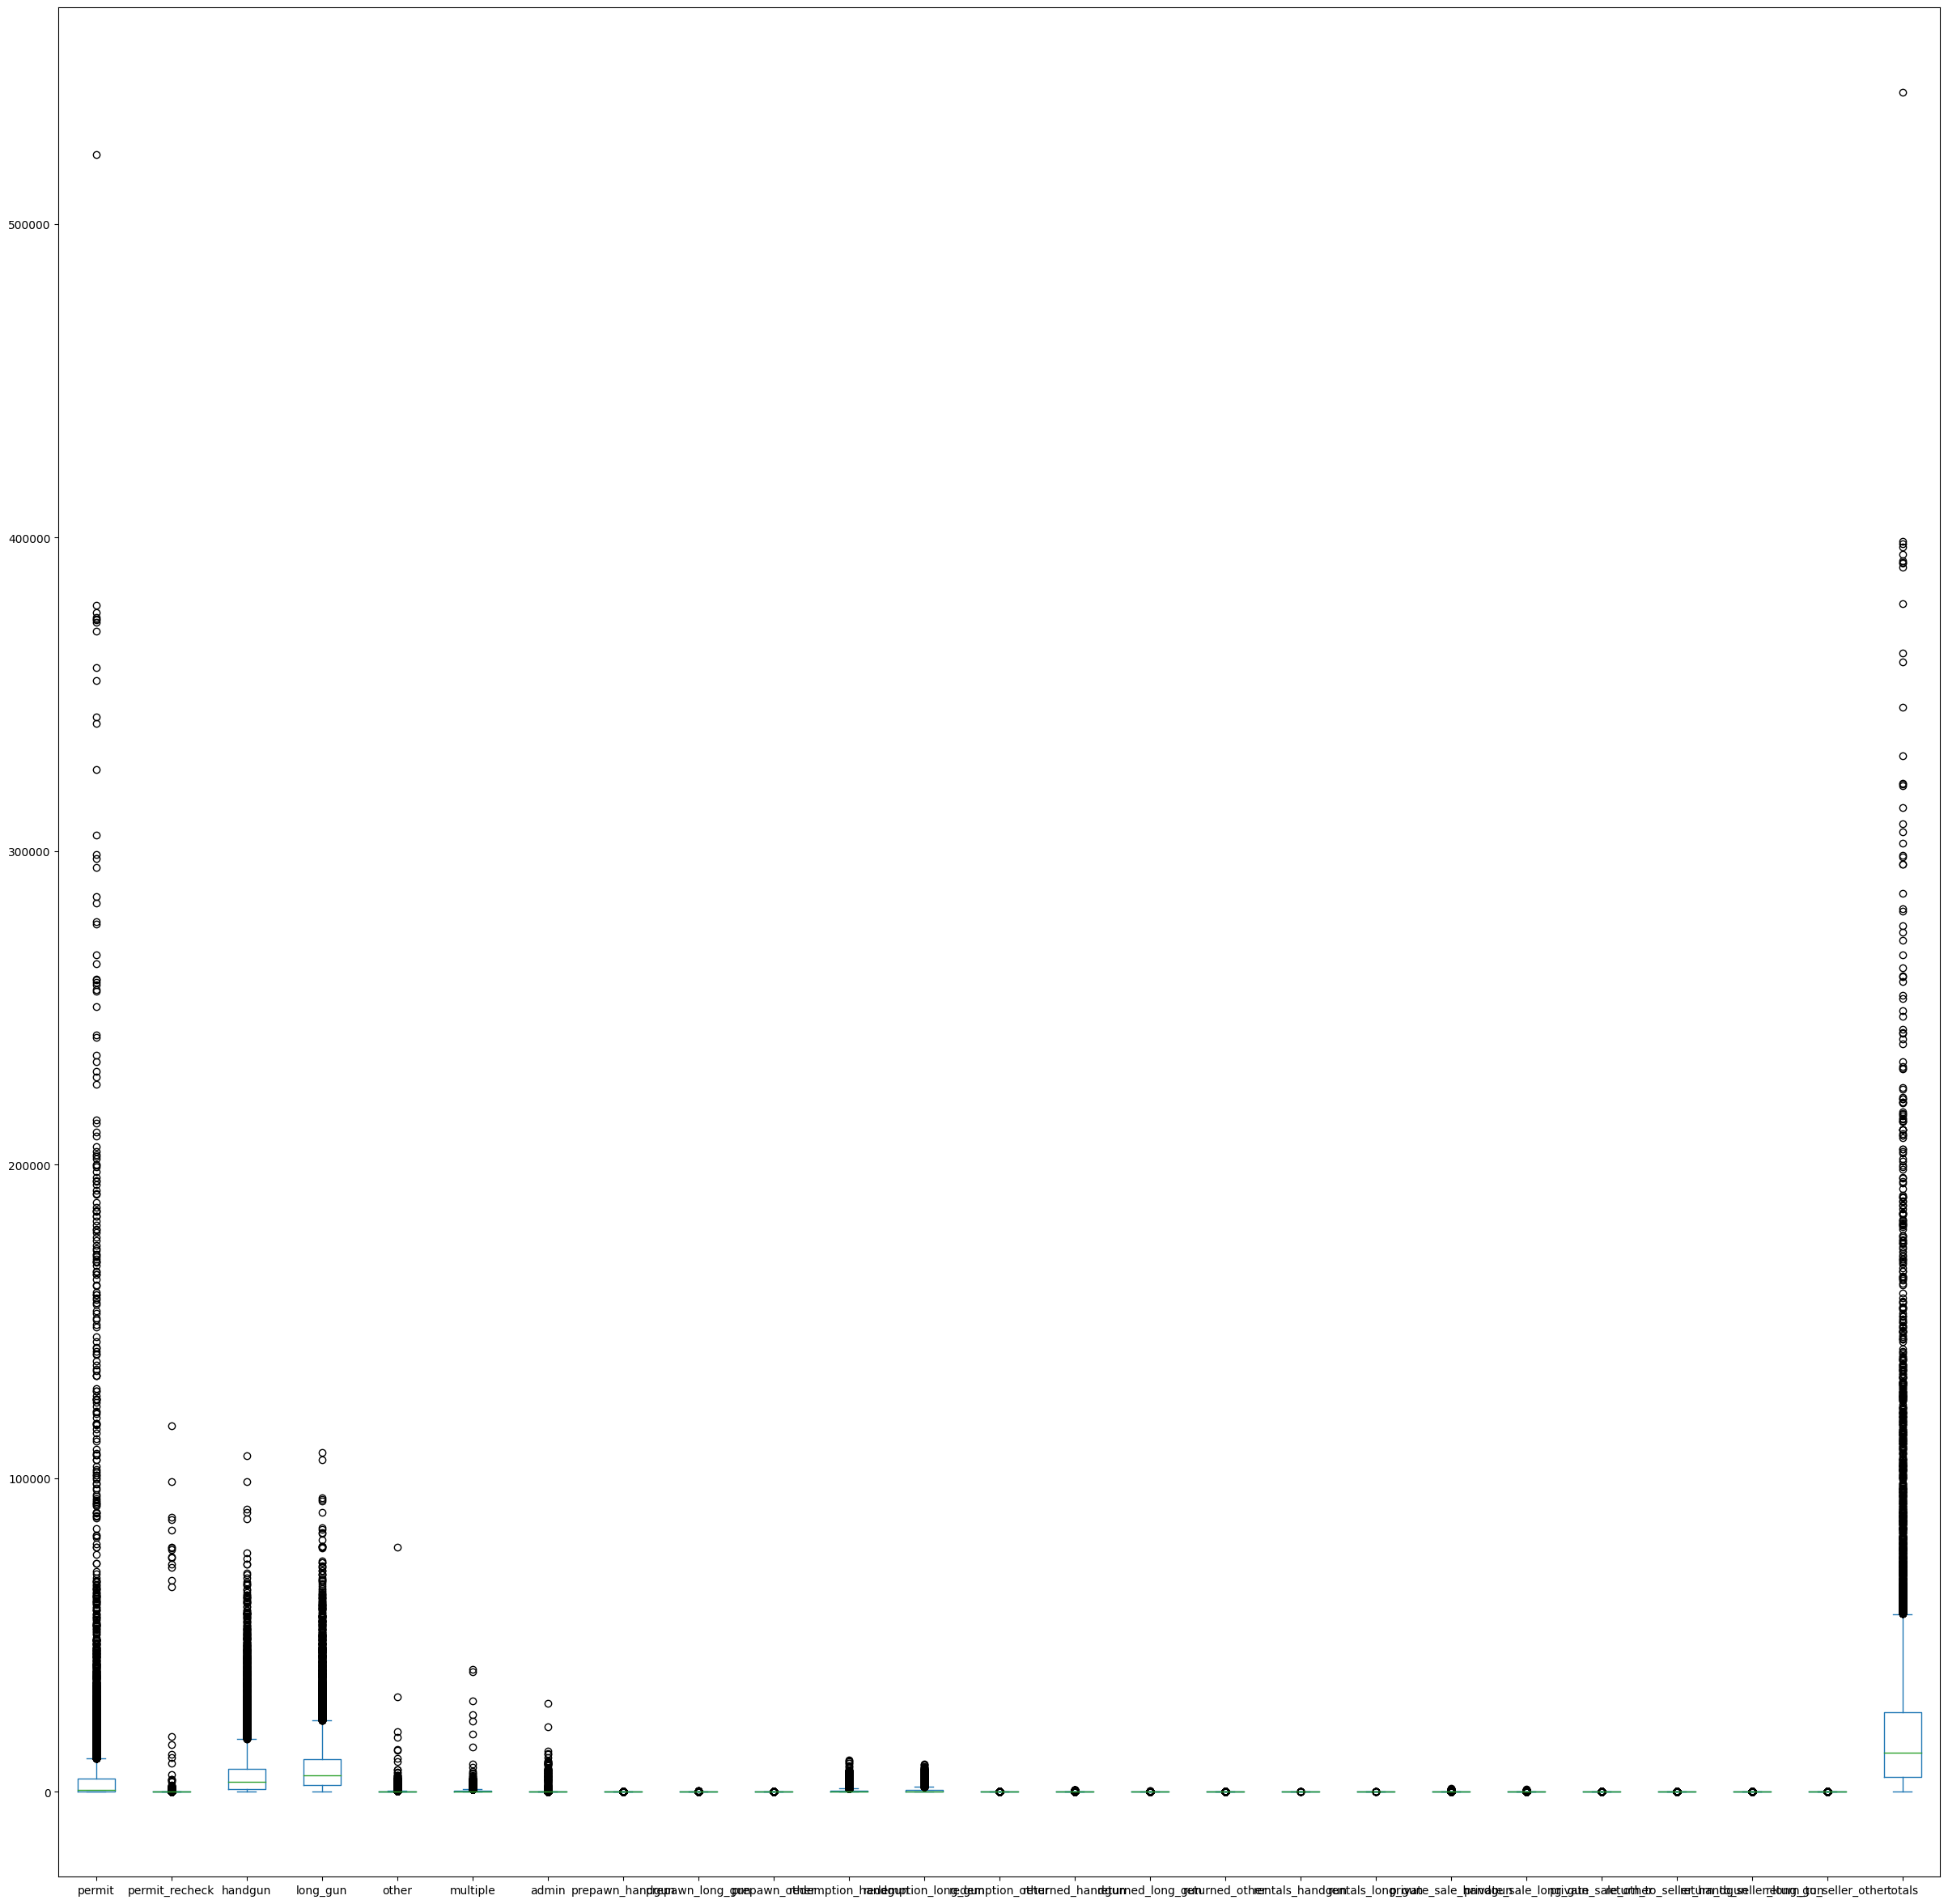

In [35]:
#To check if there any outliers using plot(kind=box)#For the first dtaset:
df_gun.plot(kind='box', figsize=(30,30))

In [36]:
#this is happening because there are a lot of '0.0' values.

array([[<AxesSubplot: title={'center': 'permit'}>,
        <AxesSubplot: title={'center': 'permit_recheck'}>,
        <AxesSubplot: title={'center': 'handgun'}>,
        <AxesSubplot: title={'center': 'long_gun'}>,
        <AxesSubplot: title={'center': 'other'}>],
       [<AxesSubplot: title={'center': 'multiple'}>,
        <AxesSubplot: title={'center': 'admin'}>,
        <AxesSubplot: title={'center': 'prepawn_handgun'}>,
        <AxesSubplot: title={'center': 'prepawn_long_gun'}>,
        <AxesSubplot: title={'center': 'prepawn_other'}>],
       [<AxesSubplot: title={'center': 'redemption_handgun'}>,
        <AxesSubplot: title={'center': 'redemption_long_gun'}>,
        <AxesSubplot: title={'center': 'redemption_other'}>,
        <AxesSubplot: title={'center': 'returned_handgun'}>,
        <AxesSubplot: title={'center': 'returned_long_gun'}>],
       [<AxesSubplot: title={'center': 'returned_other'}>,
        <AxesSubplot: title={'center': 'rentals_handgun'}>,
        <AxesSubplot

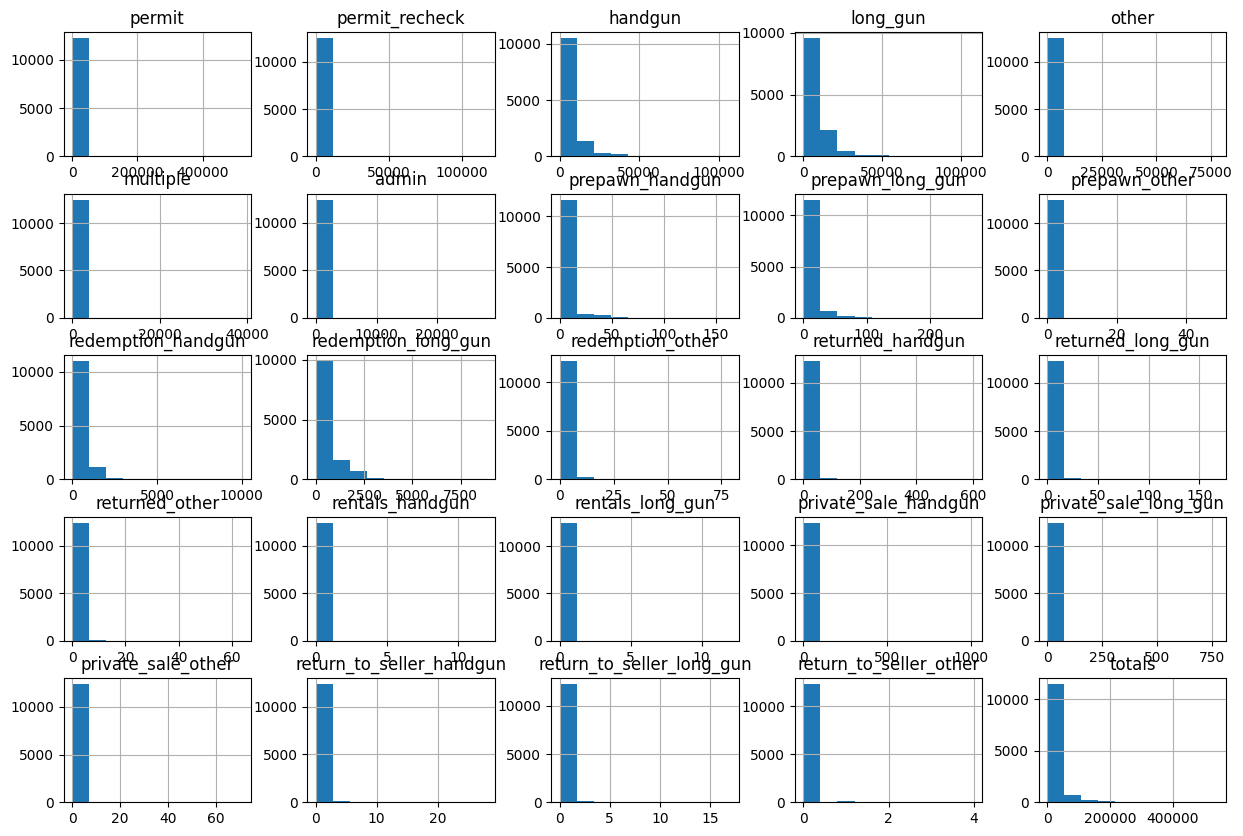

In [37]:
#let's use hist() to see the distribution of our data in df_gun
df_gun.hist(figsize=(15,10))

In [38]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis


### What are the Criminal Background Checks rate in each state?

In [39]:
# groupby "state" to see the different mean values for each state
df2 = pd.DataFrame(df_gun.groupby('state')['totals'].mean())
df2.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 55 entries, Alabama to Wyoming
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   totals  55 non-null     float64
dtypes: float64(1)
memory usage: 3.0 KB


In [40]:
#Before exploring the question (the dependent variable : Criminal background 
#checks in each state)
#Let's explore the independent variables (State and the population estimates(2010 and 2016))
#Starting with state:
#Summary statistics
df_gun['state'].describe()

count       12485
unique         55
top       Alabama
freq          227
Name: state, dtype: object

<AxesSubplot: title={'center': 'distribution of states'}, xlabel='state', ylabel='Frequency'>

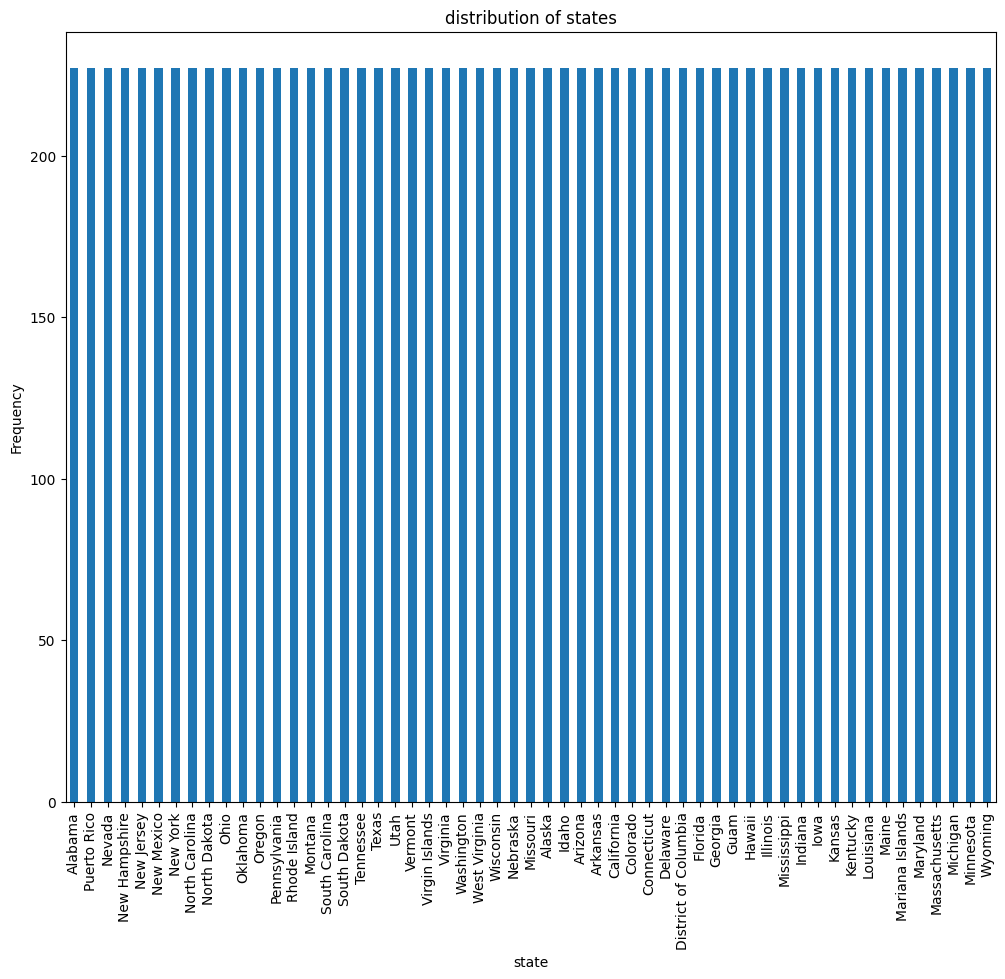

In [41]:
#Let's plot this variable to have a better look at its Frequency:
df_gun['state'].value_counts().plot(kind='bar', title='distribution of states'
                                    ,x='state',ylabel='Frequency', xlabel='state', figsize=(12,10))

In [42]:
#For the second variable 'totals' :
#Summary statistics
df_gun['totals'].describe()

count     12485.000000
mean      21595.725911
std       32591.418387
min           0.000000
25%        4638.000000
50%       12399.000000
75%       25453.000000
max      541978.000000
Name: totals, dtype: float64

<AxesSubplot: title={'center': 'distribution of totals statistics'}, xlabel='totals', ylabel='Frequency'>

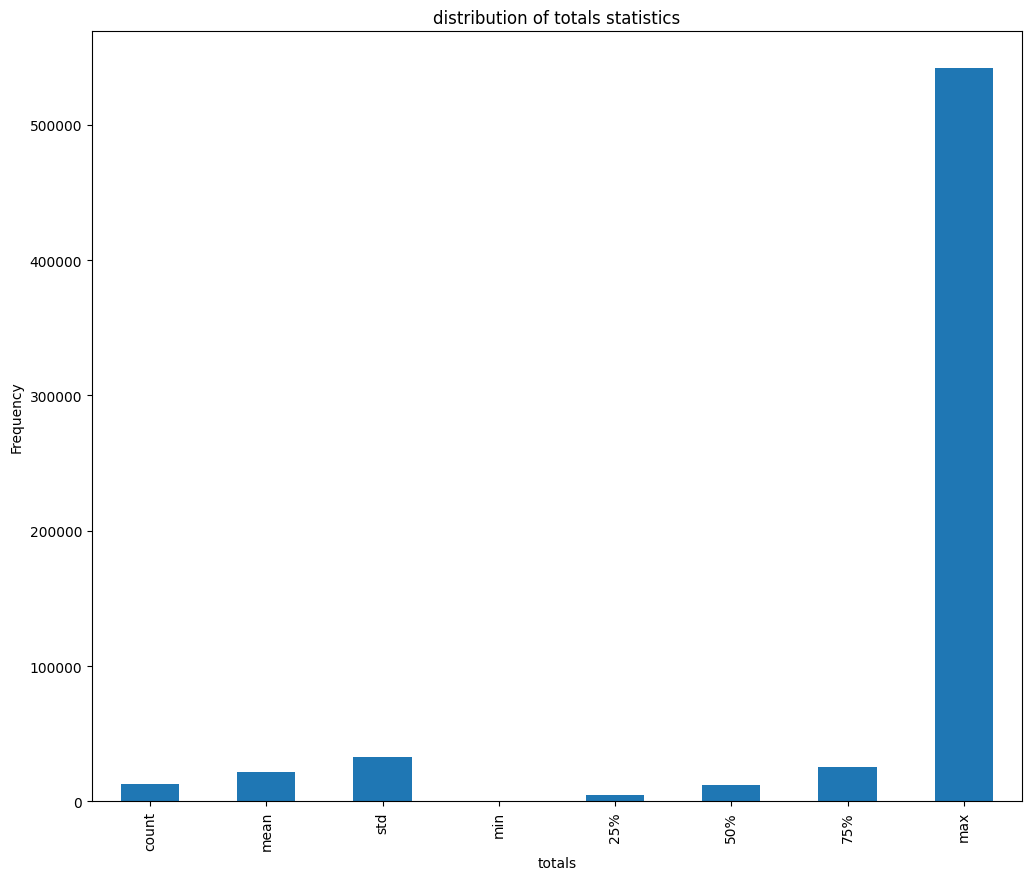

In [43]:
#Let's plot this variable to have a better look at its Frequency:
df_gun['totals'].describe().plot(kind='bar', title='distribution of totals statistics'
                                    ,x='totals',ylabel='Frequency', xlabel='totals', figsize=(12,10))

In [44]:
df.columns

Index(['Fact', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [45]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']


In [46]:
#now we want the mean value of population estimates in each state.(in 2010 and 2016)
m = [22]
for col in df.columns:
    if col != 'Fact':
        v = np.mean([df[col][0],df[col][1]])
        m.append(v)

        

In [47]:
df.loc[len(df)] = m
df.loc[2,'Fact'] = "Mean of (2010, 2016)"
df

Fact    Alabama    Alaska    Arizona   Arkansas  \
0  Population Estimates(2016)  4863300.0  741894.0  6931071.0  2988248.0   
1  Population Estimates(2010)  4780131.0  710249.0  6392301.0  2916025.0   
2        Mean of (2010, 2016)  4821715.5  726071.5  6661686.0  2952136.5   

   California   Colorado  Connecticut  Delaware     Florida  ...  \
0  39250017.0  5540545.0    3576452.0  952065.0  20612439.0  ...   
1  37254522.0  5029324.0    3574114.0  897936.0  18804592.0  ...   
2  38252269.5  5284934.5    3575283.0  925000.5  19708515.5  ...   

   South Dakota  Tennessee       Texas       Utah   Vermont   Virginia  \
0      865454.0  6651194.0  27862596.0  3051217.0  624594.0  8411808.0   
1      814195.0  6346298.0  25146100.0  2763888.0  625741.0  8001041.0   
2      839824.5  6498746.0  26504348.0  2907552.5  625167.5  8206424.5   

   Washington  West Virginia  Wisconsin   Wyoming  
0   7288000.0      1831102.0  5778708.0  585501.0  
1   6724545.0      1853011.0  5687289.0  563767.0  
2   7006272.5      1842056.5  5732998.5  574634.0  

[3 rows x 51 columns]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fact            3 non-null      object 
 1   Alabama         3 non-null      float64
 2   Alaska          3 non-null      float64
 3   Arizona         3 non-null      float64
 4   Arkansas        3 non-null      float64
 5   California      3 non-null      float64
 6   Colorado        3 non-null      float64
 7   Connecticut     3 non-null      float64
 8   Delaware        3 non-null      float64
 9   Florida         3 non-null      float64
 10  Georgia         3 non-null      float64
 11  Hawaii          3 non-null      float64
 12  Idaho           3 non-null      float64
 13  Illinois        3 non-null      float64
 14  Indiana         3 non-null      float64
 15  Iowa            3 non-null      float64
 16  Kansas          3 non-null      float64
 17  Kentucky        3 non-null      float64

In [49]:
row = df.iloc[2]
row_sliced = row.iloc[1:]
mean_values = row_sliced.values.astype("float")




<AxesSubplot: title={'center': 'Population estimates(2010,2016) in each state'}, xlabel='States', ylabel='Mean population estimates (2010-2016)'>

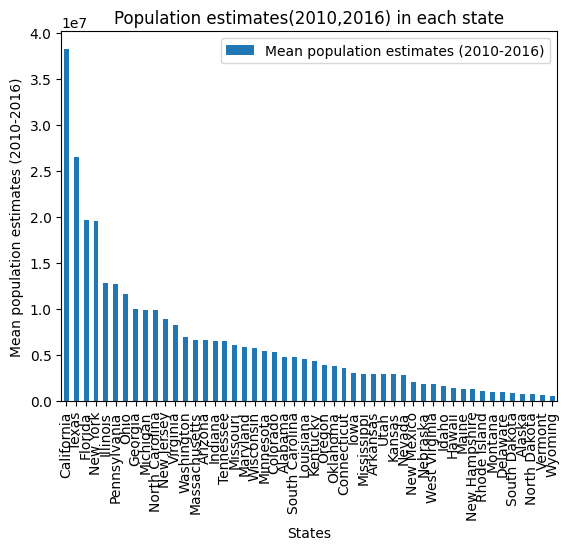

In [50]:
df_pop = pd.DataFrame({"state" : states, "Mean population estimates (2010-2016)" : mean_values
                      }).sort_values("Mean population estimates (2010-2016)",
     ascending=False)
df_pop.plot(x='state', kind='bar', xlabel="States", 
            ylabel="Mean population estimates (2010-2016)", 
            title='Population estimates(2010,2016) in each state', 
            legend='Population estimates(2010,2016)')
                                                       

In [51]:
#let's find the mean values of the totals checks over time in each state
df_totals_mean = pd.DataFrame(df_gun.groupby('state')['totals'].mean(numeric_only=True))


In [52]:
#Let's make sure that we have the same states in each dataset:
df_gun['state'].astype("str")
f=df_gun['state'].unique()


In [53]:
unmathced_states=[]

for state in f:
    if state not in states:
        unmathced_states.append(state)


In [54]:
#we need to remove the records of states in unmathced_states from df_totals_mean to match the 
#two datasets.
for g in unmathced_states:
    df_totals_mean.drop(g, inplace=True)
    


In [55]:
total_row=[]
total_row = df_totals_mean.iloc[0:].values
total_row = total_row.flatten()


<AxesSubplot: title={'center': 'Criminal Background Checks rate in each state'}, xlabel='States', ylabel='Mean Total Checks over the years'>

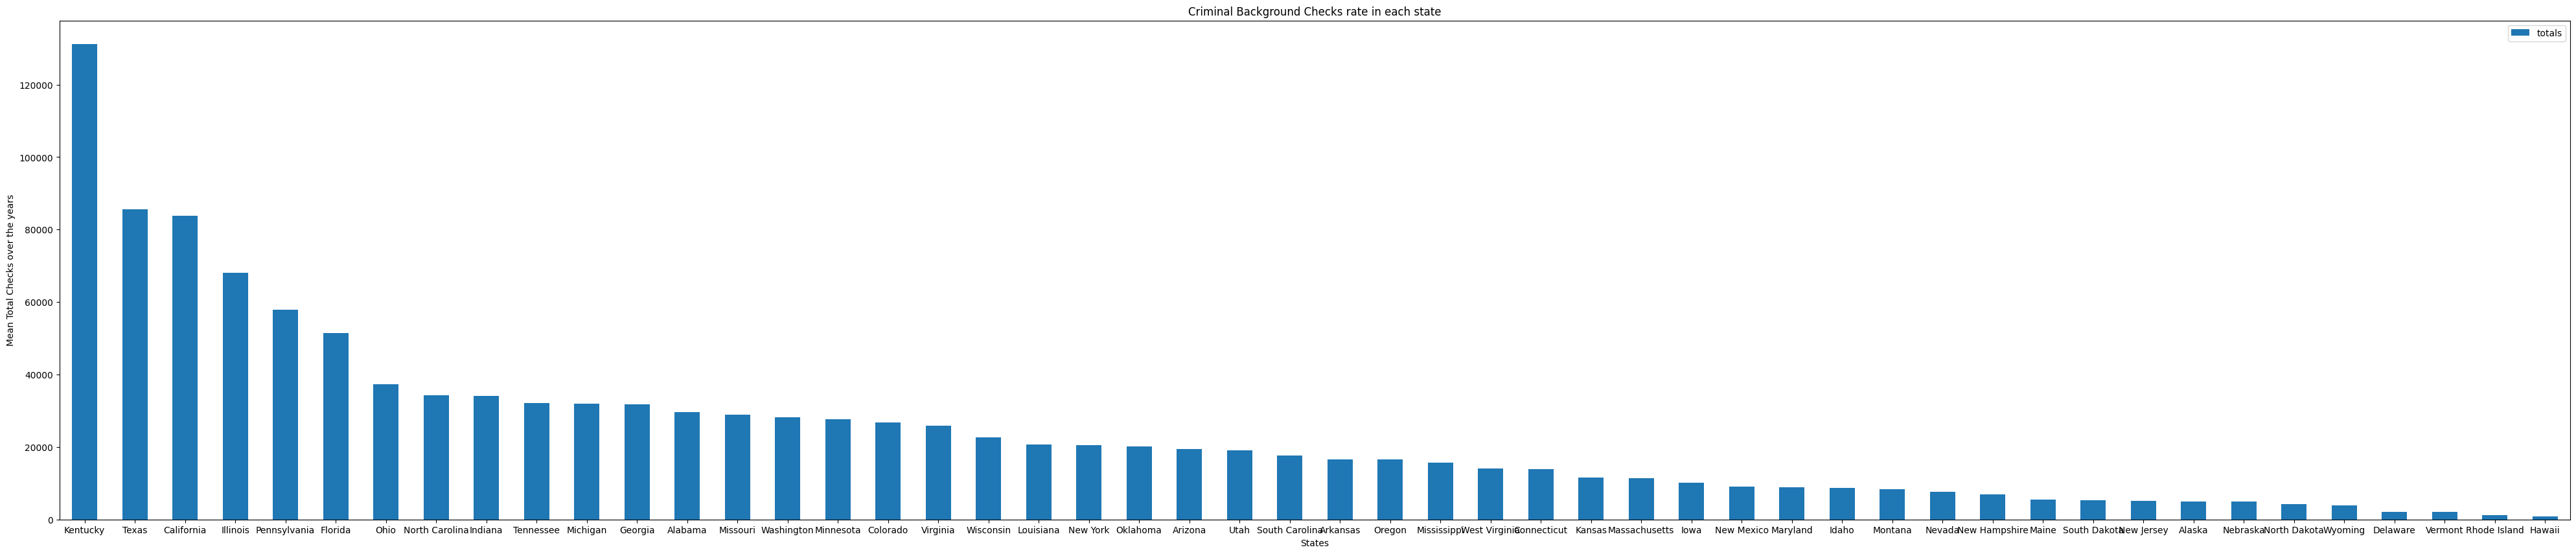

In [56]:
pd_3 = pd.DataFrame({
    "state":states, "totals":total_row}).sort_values('totals', ascending=False)
pd_3.plot(kind="bar", x = 'state', xlabel="States", ylabel="Mean Total Checks over the years",rot=0, title="Criminal Background Checks rate in each state", figsize=(50,10))

<AxesSubplot: title={'center': 'Population estimates(2010,2016) in each state'}, xlabel='States', ylabel='Mean population estimates (2010-2016)'>

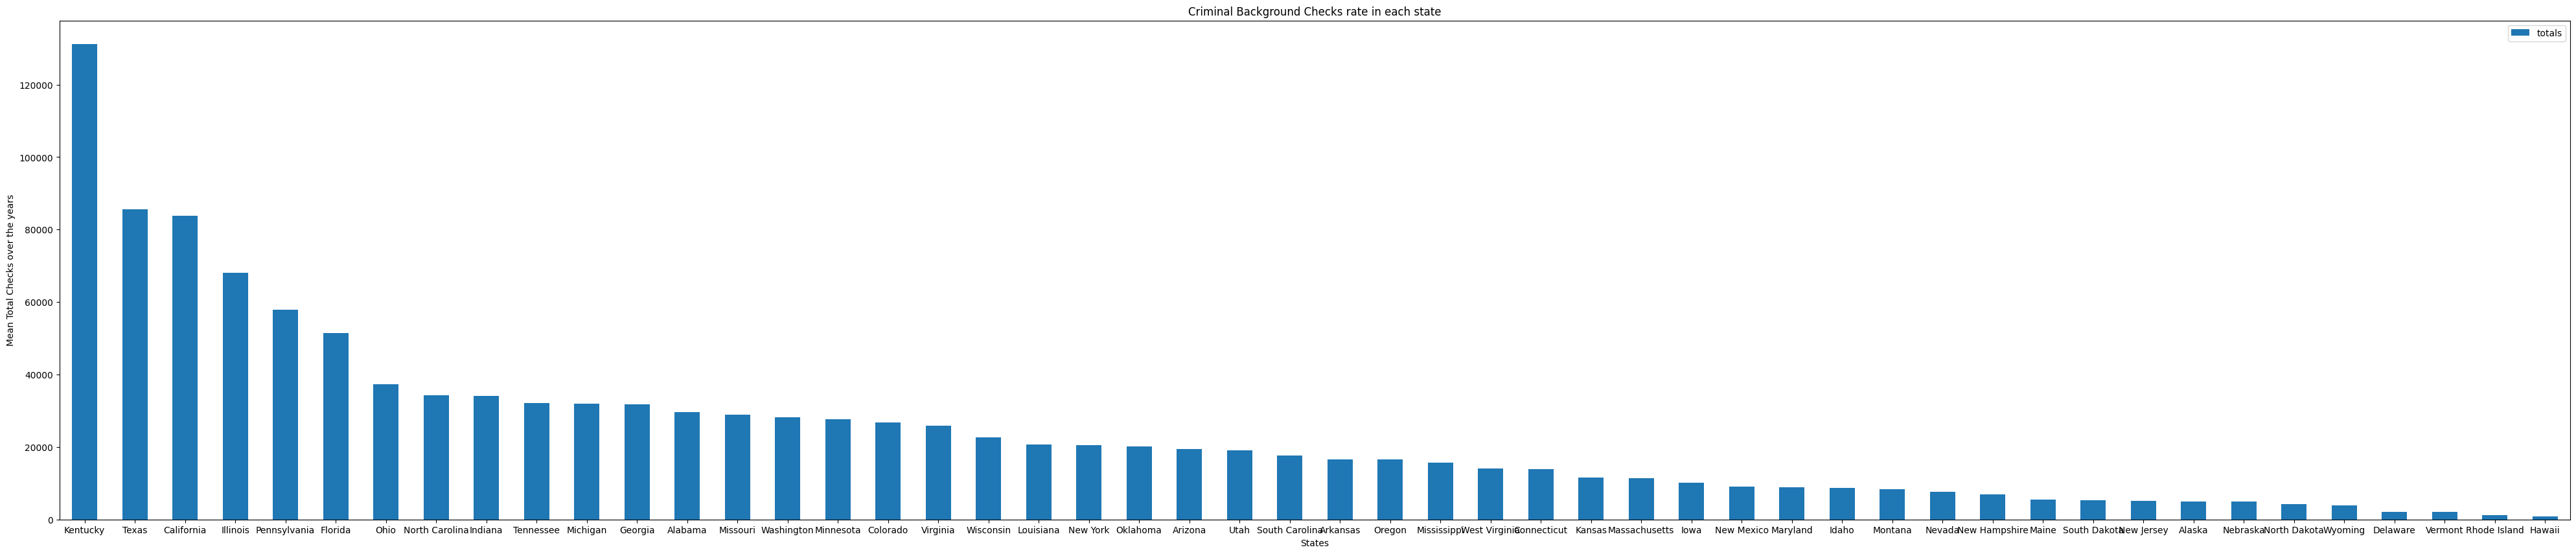

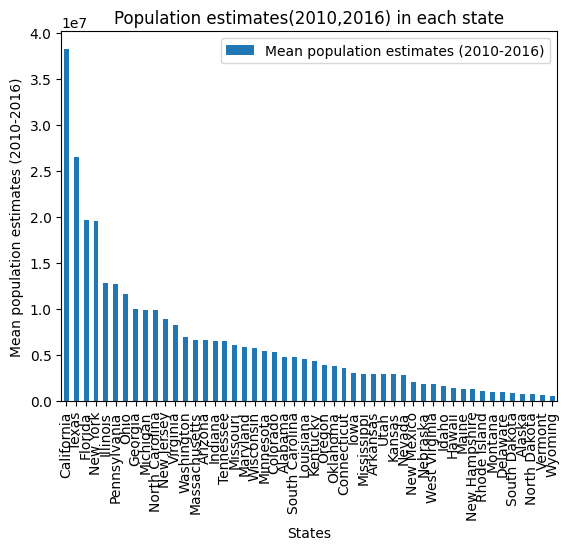

In [57]:
#Display two figures:

pd_3.plot(kind="bar", x = 'state',y='totals', xlabel="States", 
                                                 ylabel="Mean Total Checks over the years", 
                                                 rot=0, 
                                                 title="Criminal Background Checks rate in each state", 
                                                 figsize=(50,10))
df_pop.plot(x='state', kind='bar', xlabel="States",
            title='Population estimates(2010,2016) in each state',  
            ylabel="Mean population estimates (2010-2016)")



#### as shown in these figures, 
* The state with the biggest background checks rate is Kentucky.
#### But
*  the state with the biggest mean population estimates is California



# What is the trend of Criminal Background Checks for each type of firearms (Handgun, Long Gun, Other).

## First : The trend of checks for each firearm for all states over the years.

In [58]:
#we will look into the mean values of each firearm type grouped by month (that will give us 
#the mean values for all the states of that firearm in that month)
grouped_df = df_gun.groupby('month').mean(numeric_only=True)


In [59]:
#Before exploring the question (the dependent variables : Criminal Background Checks 
#for each type of firearms
#Let's explore the independent variables (States, firearms types and months)(we've done states before)
#Starting with month:
#Summary statistics
df_gun['month'].describe()

count       12485
unique        227
top       1998-11
freq           55
Name: month, dtype: object

<AxesSubplot: title={'center': 'distribution of months'}, xlabel='month', ylabel='Frequency'>

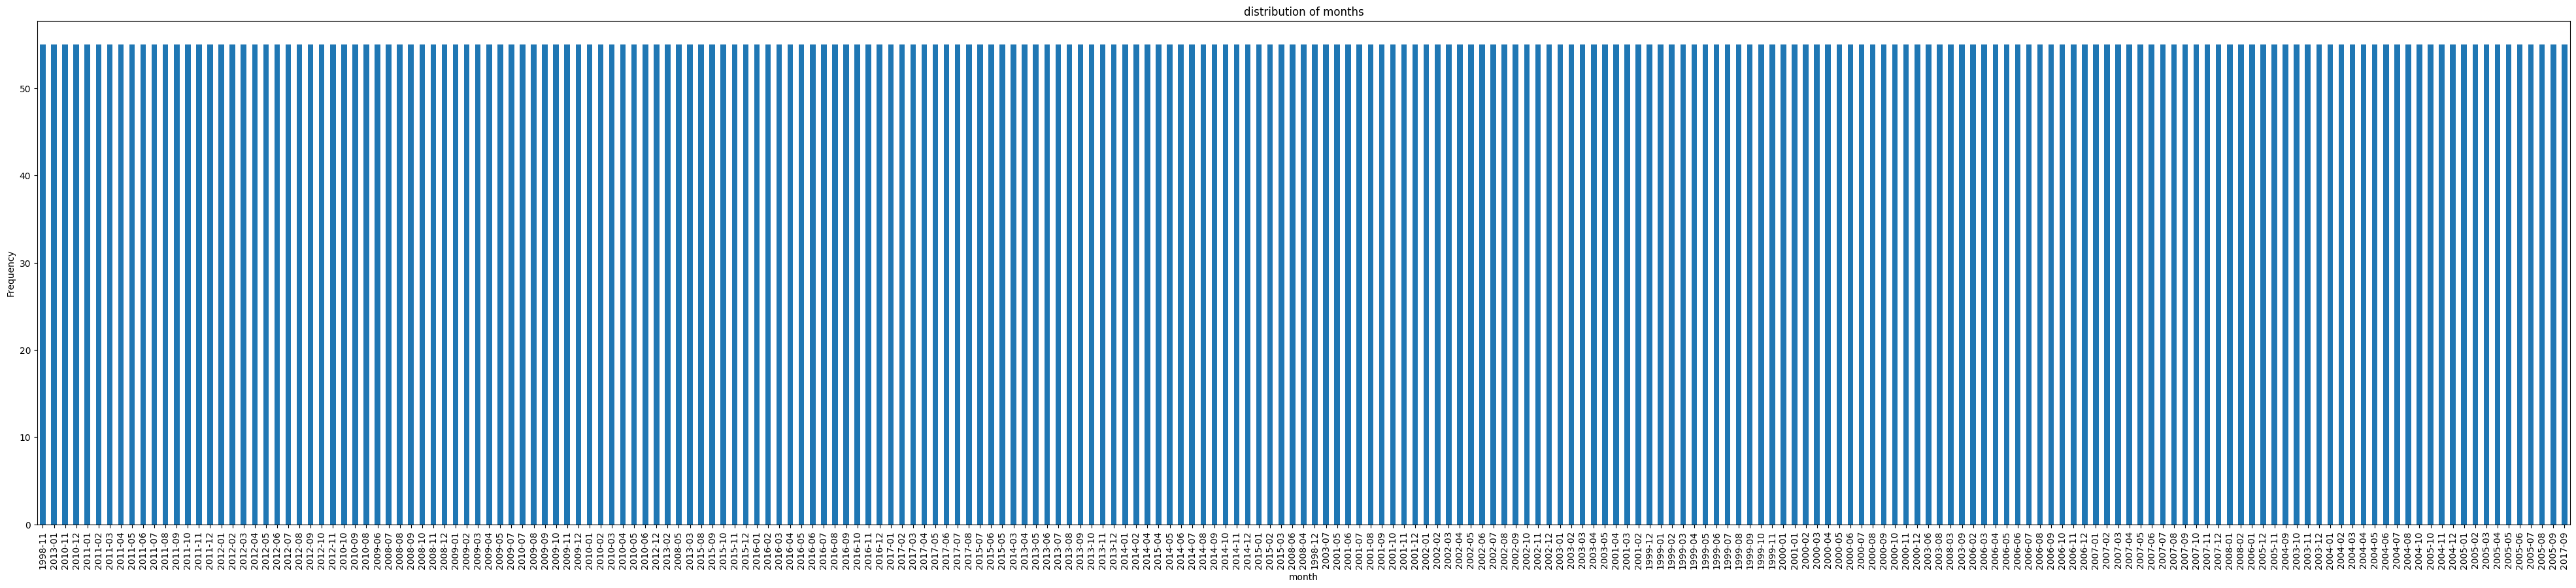

In [60]:
#Let's plot this variable to have a better look at its Frequency:

df_gun['month'].value_counts().plot(kind='bar', title='distribution of months'
                                    ,x='months',ylabel='Frequency', xlabel='month', figsize=(50,10))

In [61]:
#Starting with type handgun.
length = len(grouped_df['handgun'].values) # The length of the columns after we grouped them by month
hand_gun=np.zeros(length) # Array with values zerors so i can add all the columns that has handgun in it
for m in grouped_df.columns:
    if "handgun" in m:
        hand_gun = hand_gun + grouped_df[m].values
        
#this will give us an array with the total numbers of criminal checks for handgun type.

In [62]:
#Summary statistics
print(f"""1-The mean value of hand gun : {np.mean(hand_gun)}
2-The median is :{np.median(hand_gun)}
3-The variance is : {np.var(hand_gun)}
4-And the standard deviation is : {np.std(hand_gun)}""")


1-The mean value of hand gun : 6288.612014417301
2-The median is :4891.727272727272
3-The variance is : 13098526.039469738
4-And the standard deviation is : 3619.188588547126


array([[<AxesSubplot: title={'center': 'handgun'}>]], dtype=object)

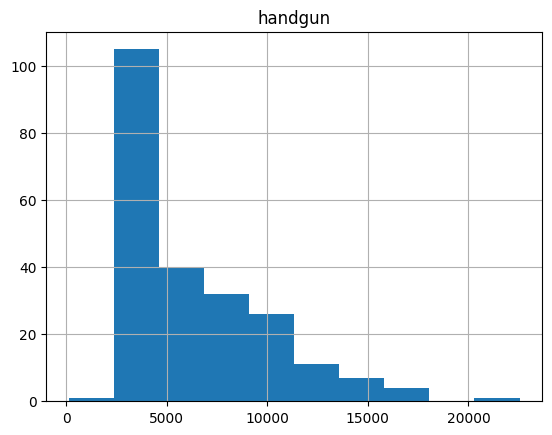

In [63]:
#Plotting hand_gun to see its distribution:
pd.DataFrame({"handgun":hand_gun}).hist()

In [64]:
# now for the long gun type
long_gun=np.zeros(length)
for m in grouped_df.columns:
    if "long_gun" in m:
        long_gun = long_gun + grouped_df[m].values
        
#this will give us an array with the total numbers of criminal checks for long gun type.

In [65]:
#Summary statistics
print(f"""1-The mean value of long gun : {np.mean(long_gun)}
2-The median is :{np.median(long_gun)}
3-The variance is : {np.var(long_gun)}
4-And the standard deviation is : {np.std(long_gun)}""")


1-The mean value of long gun : 8315.688025630756
2-The median is :7704.49090909091
3-The variance is : 8362054.208125083
4-And the standard deviation is : 2891.7216685091053


array([[<AxesSubplot: title={'center': 'long gun'}>]], dtype=object)

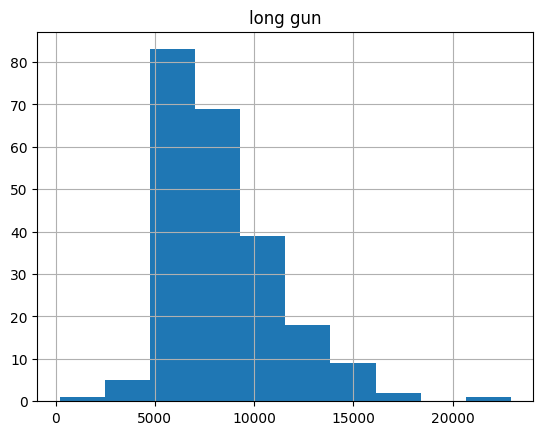

In [66]:
#Plotting long_gun to see its distribution:
pd.DataFrame({"long gun":long_gun}).hist()

In [67]:
# Finally for the other type
other=np.zeros(length)
for m in grouped_df.columns:
    if "other" in m:
        other = other + grouped_df[m].values
        
#this will give us an array with the total numbers of criminal checks for other type.

In [68]:
#Summary statistics
print(f"""1-The mean value of other : {np.mean(other)}
2-The median is :{np.median(other)}
3-The variance is : {np.var(other)}
4-And the standard deviation is : {np.std(other)}""")


1-The mean value of other : 160.00504605526635
2-The median is :0.0
3-The variance is : 72515.1099013586
4-And the standard deviation is : 269.2862972773747


array([[<AxesSubplot: title={'center': 'other'}>]], dtype=object)

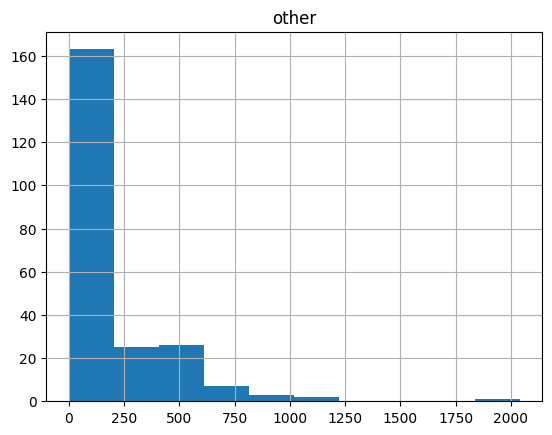

In [69]:
#Plotting other to see its distribution:
pd.DataFrame({"other":other}).hist()

In [70]:
months = df_gun['month'].unique()#Excracting the months.

<AxesSubplot: title={'center': 'Background criminal checks of different firearm checks over the time'}, xlabel='month', ylabel='Firearem checks'>

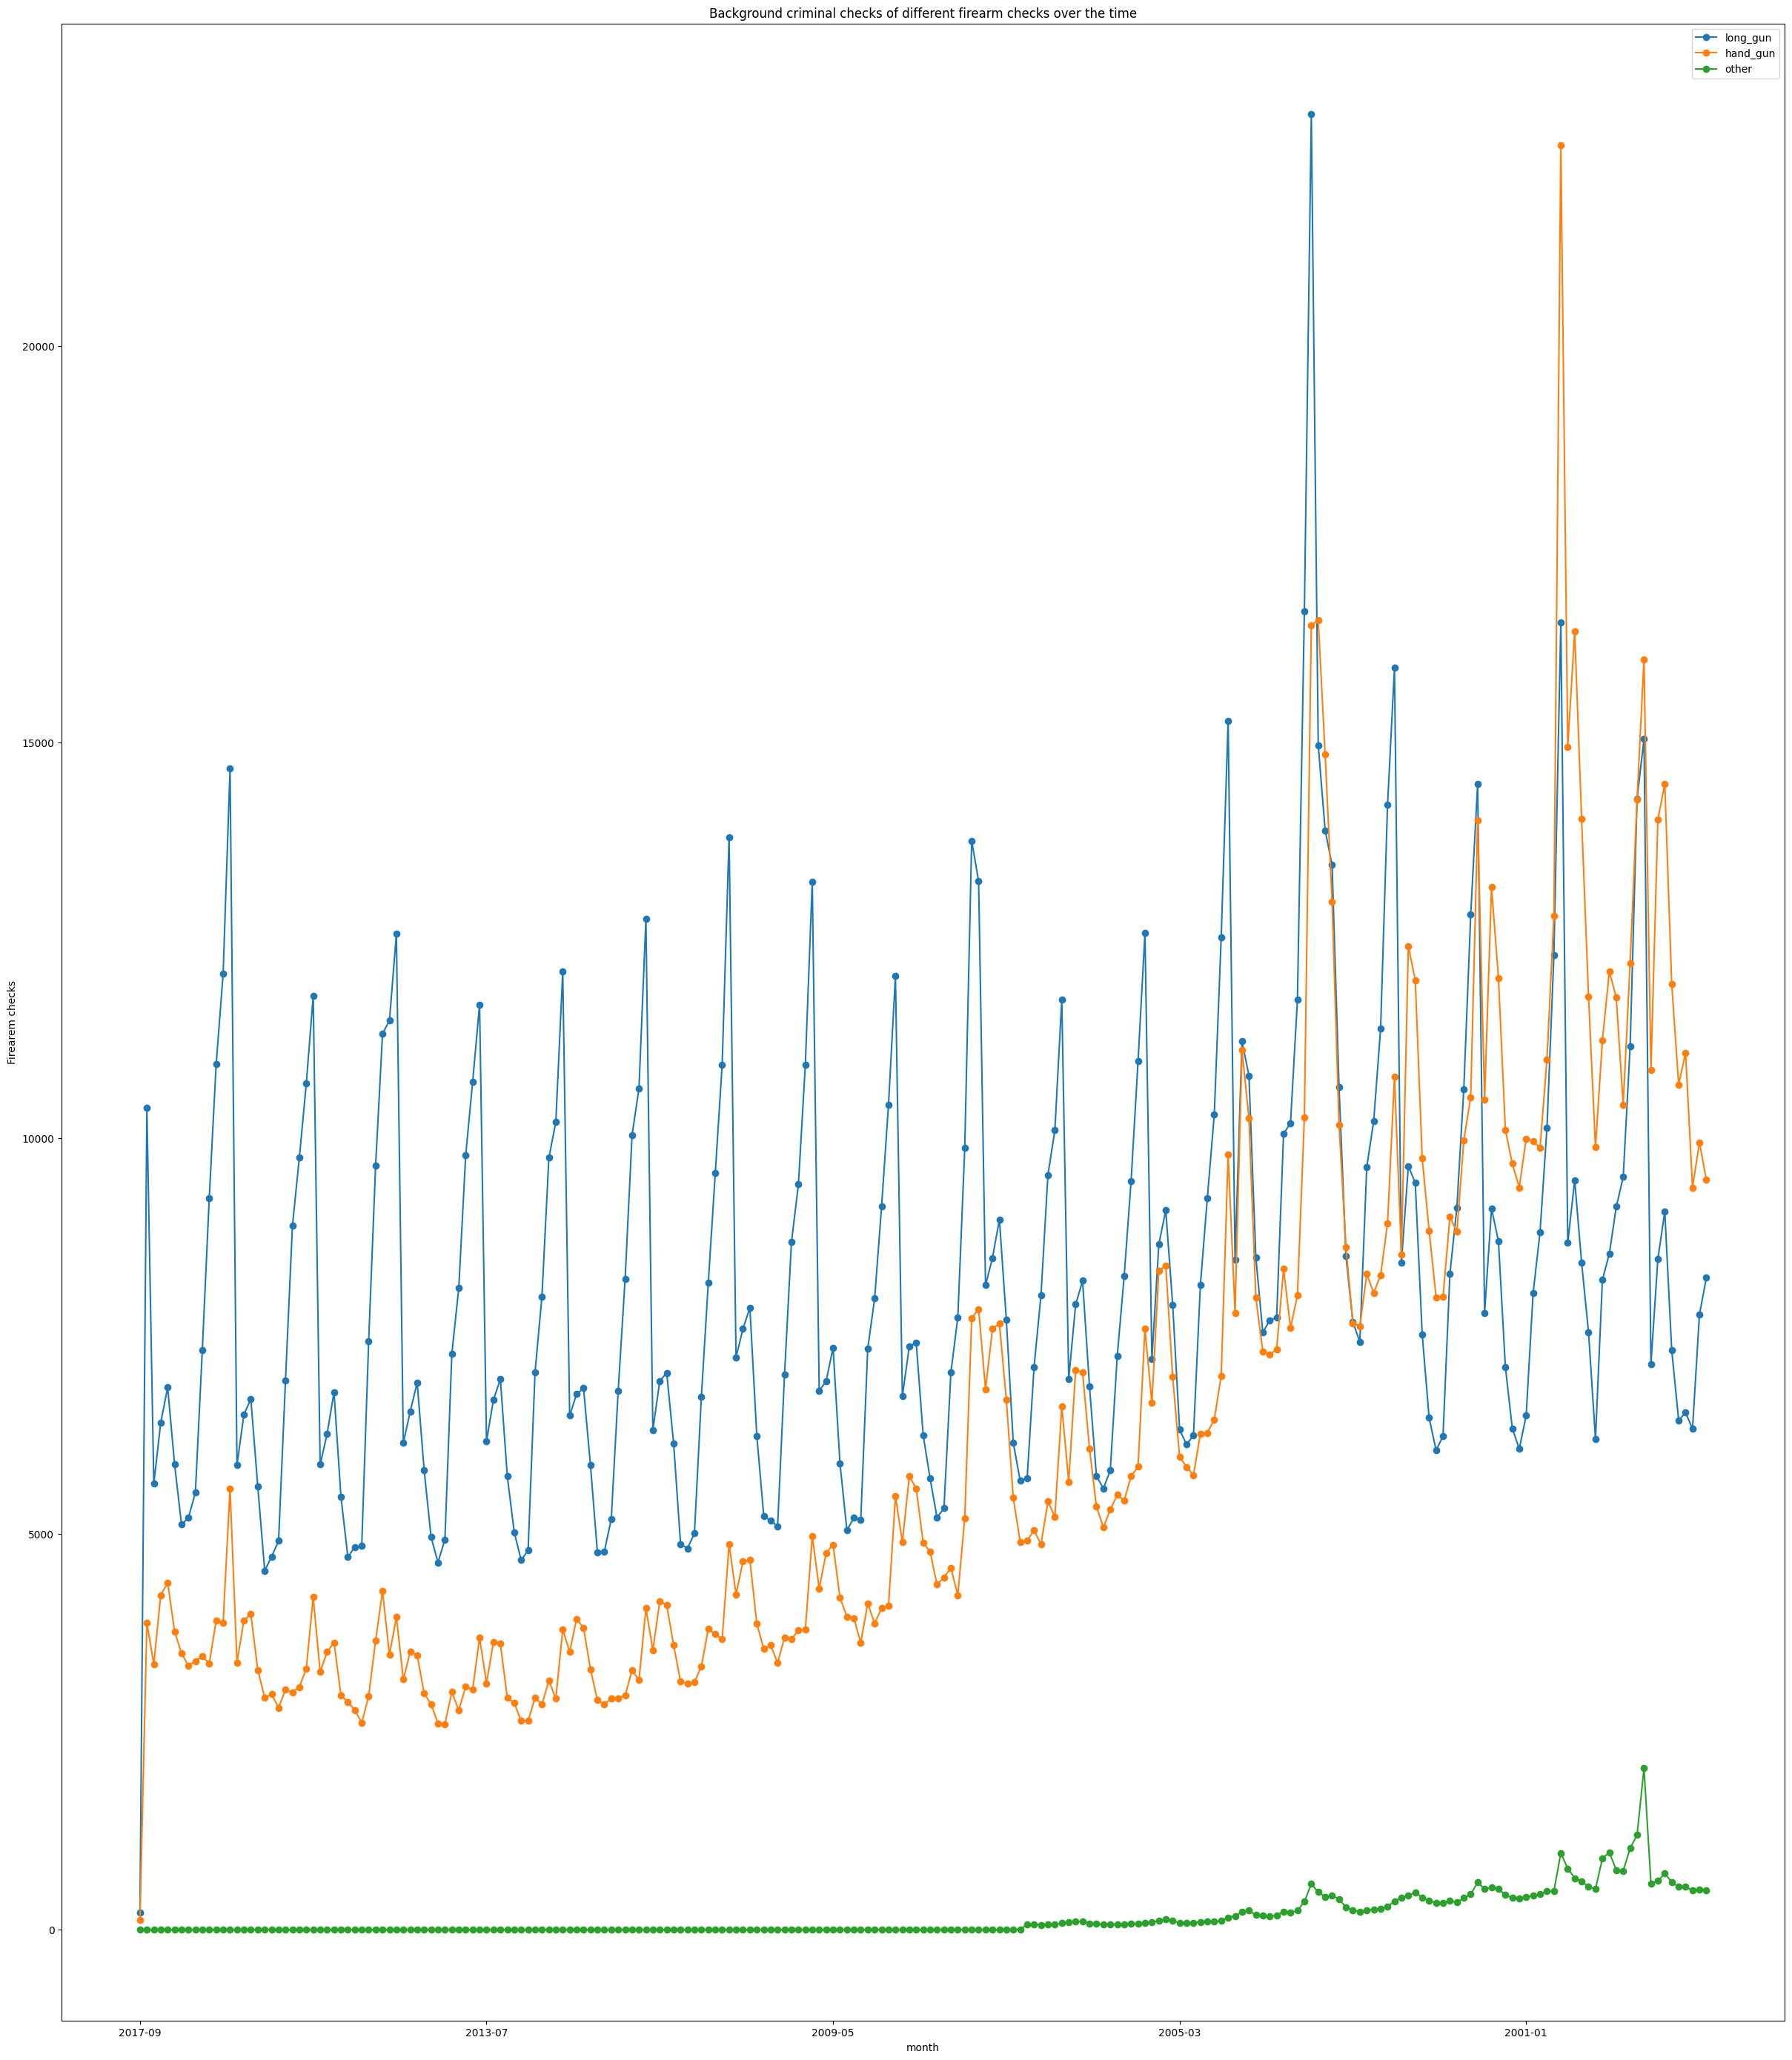

In [71]:
df_r = pd.DataFrame({"month" : months, "long_gun" : long_gun, 
                     "hand_gun" : hand_gun, "other" : other})
df_r.plot(kind='line', figsize=(30,35), x="month", xlabel="month", ylabel="Firearem checks", 
          marker='o', 
          title="Background criminal checks of different firearm checks over the time")

### *According to the figure above thr Firearm of type Long gun has the biggest numbers of background criminal checks over the years in all the states.*


## Second : The trend of checks for each firearm of each state.

In [72]:
#we will look into the mean values of each firearm type grouped by state (that will give us 
#the mean values for each state of that firearm over the months)
grouped_df2 = df_gun.groupby('state').mean(numeric_only=True)


In [73]:
for g in unmathced_states:
    grouped_df2.drop(g, inplace=True)
    
grouped_df2

permit  permit_recheck       handgun      long_gun  \
state                                                                       
Alabama           4614.277533        3.299559   9788.709251  11568.409692   
Alaska              58.819383        0.096916   1914.546256   2520.590308   
Arizona           3129.995595       29.519824   7847.876652   6523.180617   
Arkansas          2237.669604       59.889868   4253.674009   7327.118943   
California       28768.911894        0.000000  26039.118943  26153.171806   
Colorado          1880.925110        0.000000  11138.422907  12008.955947   
Connecticut       7027.621145        6.022026   3873.392070   2810.995595   
Delaware           100.088106        0.000000    916.779736   1067.114537   
Florida           4796.484581        0.000000  26035.030837  16868.237885   
Georgia           7870.960352        0.000000   9373.466960  10080.995595   
Hawaii             869.255507        0.000000      0.013216      0.154185   
Idaho             1626.519824        0.264317   2078.572687   3883.026432   
Illinois         41844.224670     5027.837004  10726.797357  10083.881057   
Indiana          13065.022026        0.000000   9609.136564  10293.929515   
Iowa              6466.845815       37.488987     81.550661   3407.955947   
Kansas             684.894273        0.281938   4102.651982   5682.387665   
Kentucky        109809.599119        0.000000   7723.550661   9867.237885   
Louisiana          371.700441        0.000000   7922.317181  10096.471366   
Maine               76.035242        0.004405   1937.237885   3154.356828   
Maryland          1523.519824        0.000000   2650.466960   4581.035242   
Massachusetts     6014.207048        0.074890   2915.687225   1898.176211   
Michigan         14595.048458       90.149780   4144.753304  12601.493392   
Minnesota        10808.973568        0.000000   5307.682819  10603.158590   
Mississippi        440.286344        0.000000   5225.691630   7566.779736   
Missouri          2023.088106        0.000000  10654.616740  13532.766520   
Montana            639.374449        0.026432   2056.629956   4225.515419   
Nebraska          2454.590308        5.674009     56.524229   2388.678414   
Nevada             937.982379        0.000000   3353.418502   2768.022026   
New Hampshire     1803.207048        0.000000   2516.885463   2588.753304   
New Jersey           0.000000        0.000000   2537.136564   2412.577093   
New Mexico         410.753304        0.000000   3499.753304   3961.863436   
New York          3543.938326       63.533040   4354.568282  11980.515419   
North Carolina   17061.559471        0.000000    665.682819  13052.118943   
North Dakota       460.466960        0.000000    924.295154   2557.440529   
Ohio              1640.004405       14.638767  16702.453744  16063.105727   
Oklahoma             0.039648        0.000000   7766.061674   8912.325991   
Oregon             162.550661        0.634361   7251.731278   8896.484581   
Pennsylvania      6590.343612        0.000000   9541.960352  41337.629956   
Rhode Island         0.000000        0.000000    610.370044    536.696035   
South Carolina    4120.348018       25.458150   6005.299559   5888.885463   
South Dakota       161.396476        0.000000   1391.193833   3393.308370   
Tennessee         4980.035242      276.198238  13731.295154  12627.070485   
Texas            12588.466960        0.000000  28607.189427  33706.590308   
Utah             12129.770925        2.550661   2498.955947   4098.458150   
Vermont              0.000000        0.000000    819.418502   1255.788546   
Virginia           113.162996        0.000000  12711.422907  12603.568282   
Washington        7348.718062        5.431718   8922.898678   9031.497797   
West Virginia      436.202643        0.000000   4405.374449   6652.911894   
Wisconsin         3383.660793        0.000000   7036.004405  11720.656388   
Wyoming            347.929515        0.933921   1236.925110   1929.938326   

                  

In [74]:
#Starting with type handgun.
length2 = len(grouped_df2['handgun'].values) # The length of the columns after we grouped them by state
hand_gun2=np.zeros(length2) # Array with values zerors so i can add all the columns that has handgun in it
for m in grouped_df2.columns:
    if "handgun" in m:
        hand_gun2 = hand_gun2 + grouped_df2[m].values
        
#this will give us an array with the total numbers of criminal checks 
#for handgun type in each state.

In [75]:
# Now for the long gun type
long_gun2=np.zeros(length2)
for m in grouped_df2.columns:
    if "long_gun" in m:
        long_gun2 = long_gun2 + grouped_df2[m].values
        
#this will give us an array with the total numbers of criminal checks for 
#long gun type in each state.

In [76]:
# Finally for the other type
other2=np.zeros(length2)
for m in grouped_df2.columns:
    if "other" in m:
        other2 = other2 + grouped_df2[m].values
        
#this will give us an array with the total numbers of criminal checks for 
#other type in each state.

<AxesSubplot: title={'center': 'Background criminal checks of different firearm checks for each state'}, xlabel='state', ylabel='Firearem checks'>

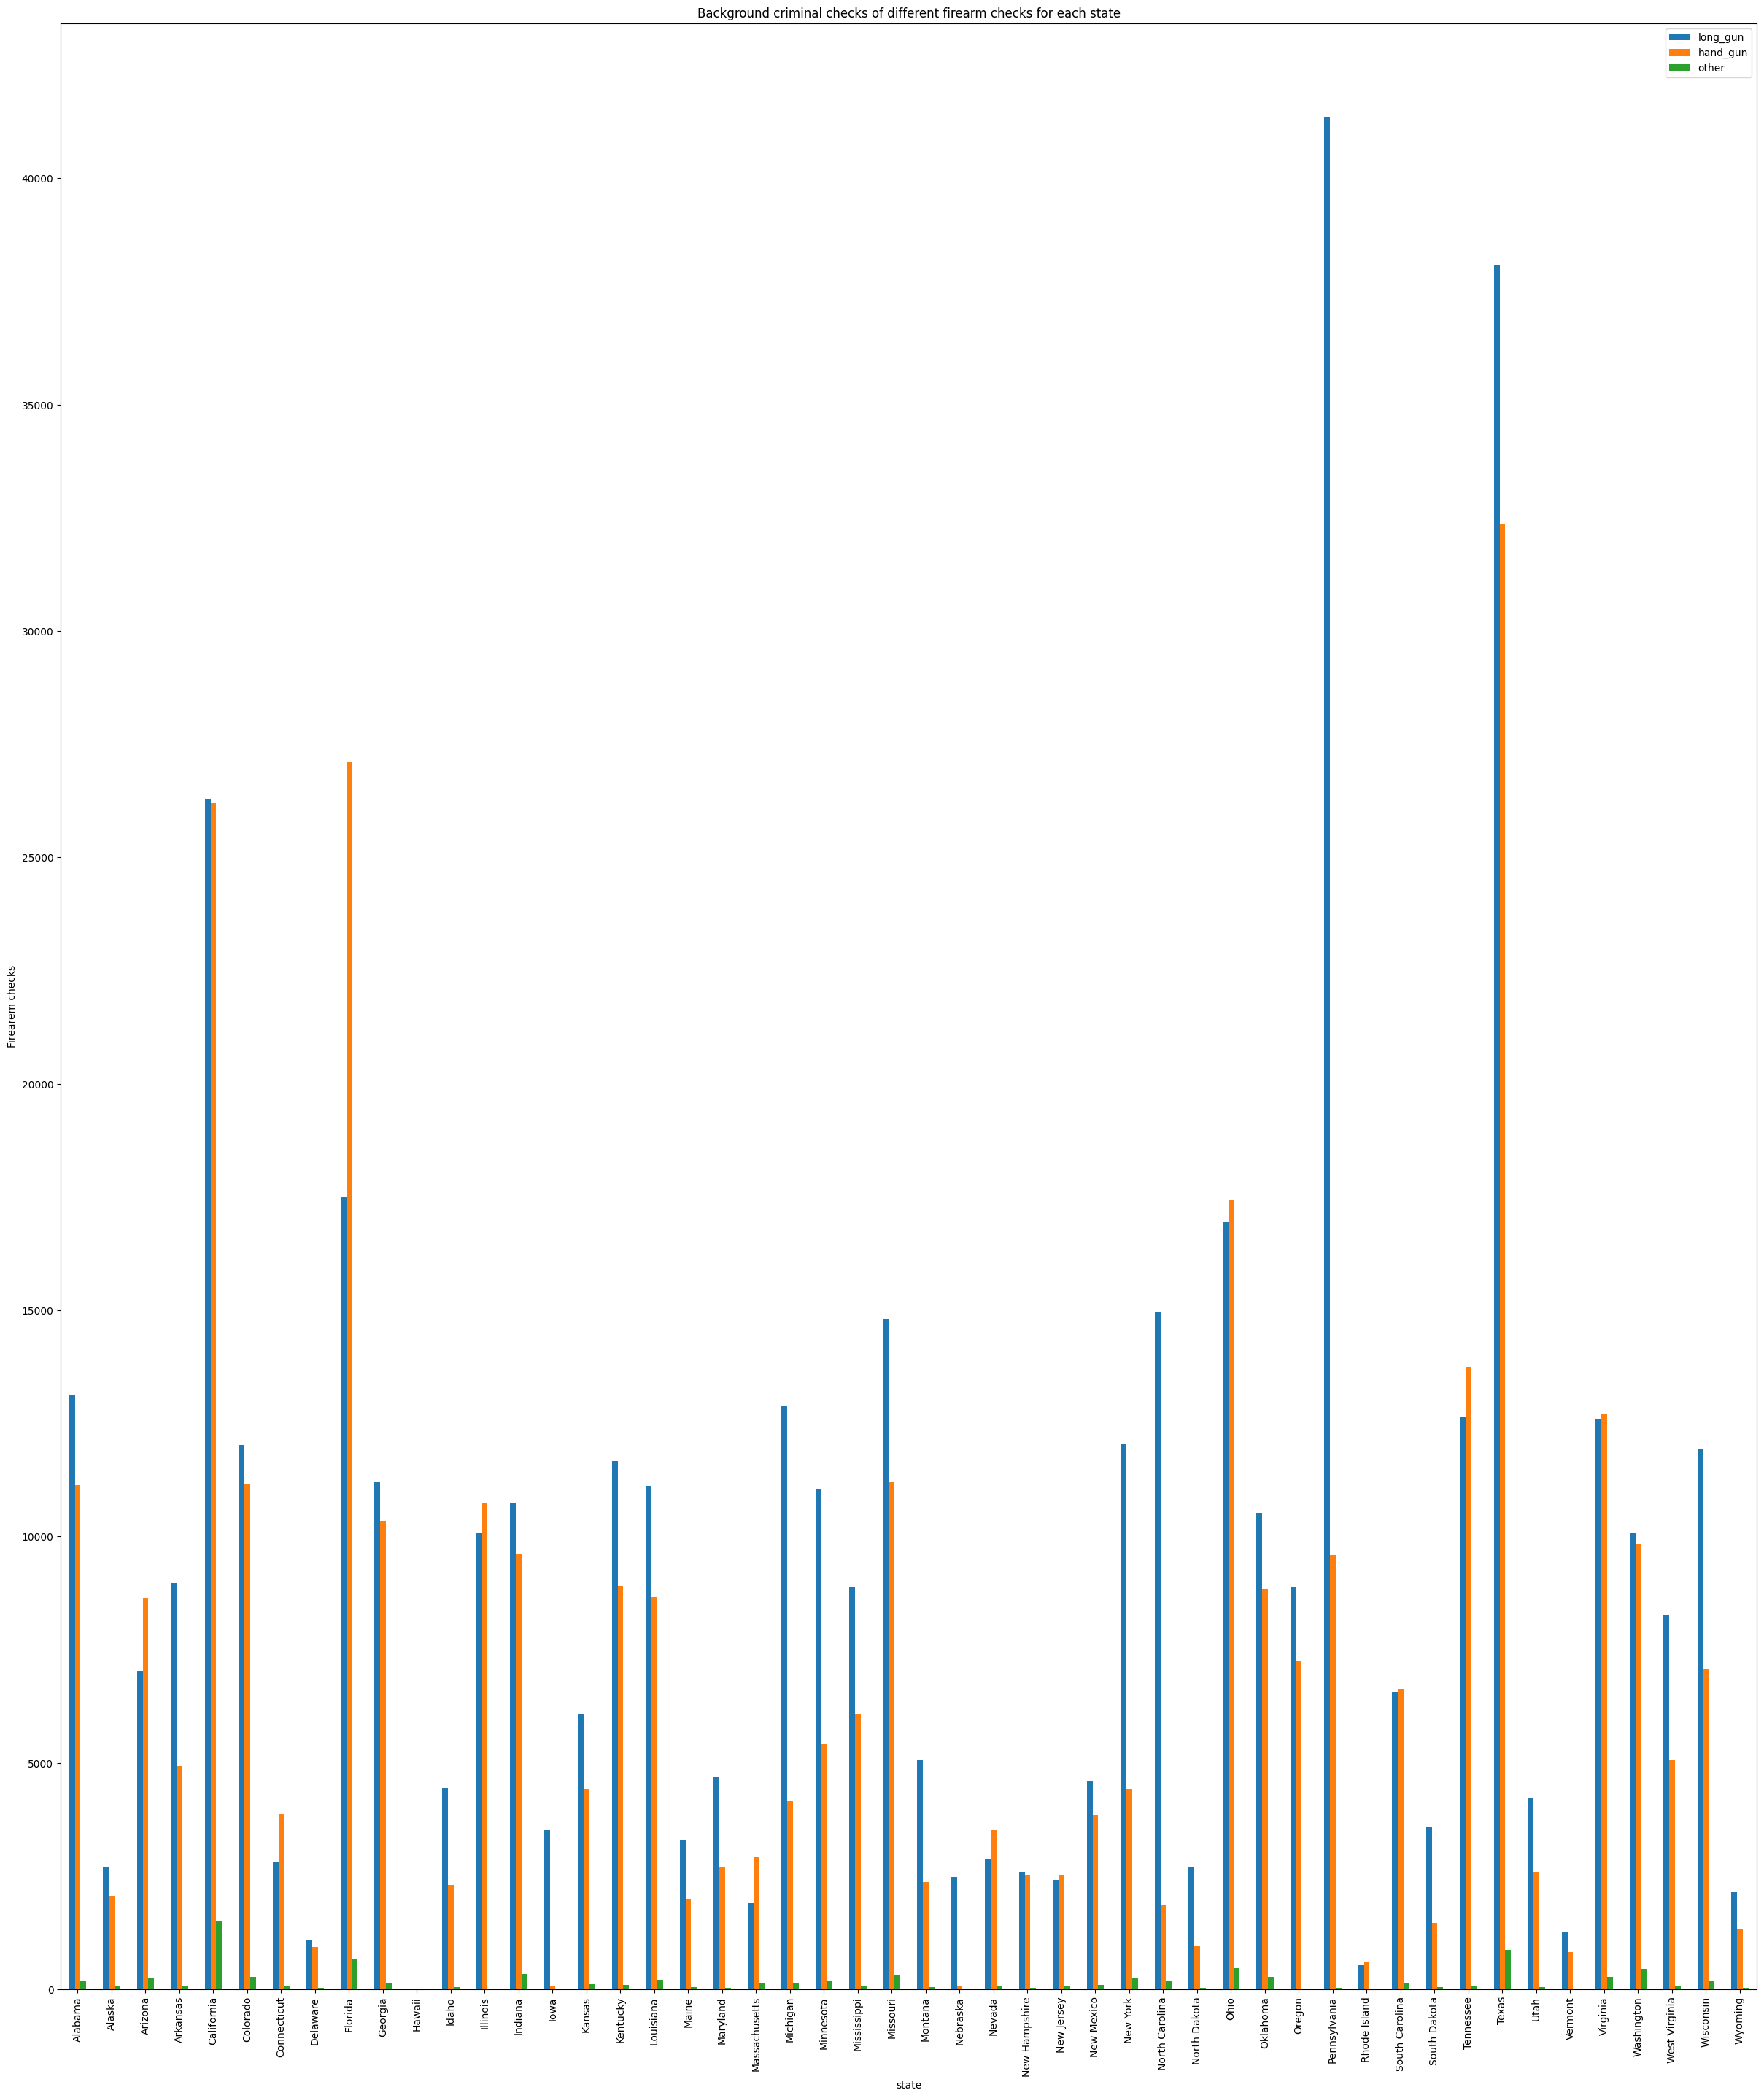

In [77]:
df_r2 = pd.DataFrame({"state" : states, "long_gun" : long_gun2, 
                     "hand_gun" : hand_gun2, "other" : other2})
df_r2.plot(kind='bar', figsize=(30,35), x="state", xlabel="state", ylabel="Firearem checks", 
           
          title="Background criminal checks of different firearm checks for each state")

In [78]:
### It looks like the background criminal checks of type Long gun are the dominants 

<a id='conclusions'></a>
## Conclusions
### -Research Limitations
    While analyzing the FBI's National Criminal Background Check System (NICS) dataset, several limitations were spotted that may affect the reliability of the results. Understanding and acknowledging these limitations is so important for guiding future research efforts and makeing them better.
    1-Limited Access to Information : 
      limited access to information within the NICS dataset. The dataset primarily focuses on the number of background checks for firearm purchases but does not give any other details about who for example made the check (Their races, ages and maybe their gender), because of this limitation i wasn't able to ask this question : "What population groups are more likely to purchase certain types of firearms."and the question "Is there a certain population groups that are afraid that made them have the biggest rate of firearm checks?" and the lack of the details about if the checks were denied or accepted, prevent me from asking the question : "what population groups are more likely to have thier checks get denied?", This limitation is significant because it restricts the depth of analysis that can be performed.
      
      2-Missing Data:
          There was so many missing data that i had to fill with zerors, however that might not be the appropriate approach because it may lead to bias in the analysis.
          
          
      Suggestions for Future Research:
         -Enhancing the collection of data : the NICS dataset may include more details about the data in the future. 
         
      
      
    
           

### -What are the Criminal Background Checks rate in each state?
    I started first with calculating the mean values of population estimates for each state in 
    (2010 and 2016), the plotted these mean values of the population estimates for each state
    and the state with the biggest population estimates is California, logically california
    should have the highest rate of overall criminal background checks, but surprisingly
    it wasn't, the state with the highest rate of overall criminal background checks is
    Kentucky.
    
    
### -What is the trend of Criminal Background Checks for each type of firearms (Handgun, Long Gun, Other).
#### * First : The trend of checks for each firearm for all states over the years.
        I first took the mean value for every firearm types for all the state in each month,
        after plotting the dataframe that has the months and the total mean values for
        each firearm type, it appeared that the firearm of type long gun has the biggest values 
        over the time.
#### * Second : The trend of checks for each firearm of each state.
        I first took the mean value for every firearm types over the months for each state,
        after plotting the dataframe that has the states and the total mean values for
        each firearm type, it appeared that the firearm of type long gun has the biggest                values in each state.
        
        (is the long gun better?)



In [82]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 2171612 bytes to Investigate_a_Dataset.html
